# Analysis of stock returns forecasts

**Reference**: Realized GARCH models: Simpler is better (Xie & Yu, 2019)

Sample: France (^FCHI)

In [1]:
# Memory clearing
rm(list=ls())

## 1. Data import

In [2]:
# Packages
install.packages('quantmod')
install.packages('tidyquant')
install.packages('PerformanceAnalytics')

library(quantmod)
library(tidyquant)
library(PerformanceAnalytics)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘zoo’, ‘TTR’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘listenv’, ‘parallelly’, ‘prodlim’, ‘future’, ‘globals’, ‘later’, ‘gower’, ‘ipred’, ‘furrr’, ‘htmlwidgets’, ‘crosstalk’, ‘promises’, ‘warp’, ‘fracdiff’, ‘lmtest’, ‘tseries’, ‘urca’, ‘RcppArmadillo’, ‘quadprog’, ‘recipes’, ‘rsample’, ‘plotly’, ‘padr’, ‘slider’, ‘anytime’, ‘forecast’, ‘snakecase’, ‘PerformanceAnalytics’, ‘lazyeval’, ‘Quandl’, ‘riingo’, ‘alphavantager’, ‘timetk’, ‘timeDate’, ‘janitor’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: TTR

Registered S3 method 

**Reading the datas (Source: Yahoo Finance)**

In [4]:
getSymbols("^FCHI", from = '2000-01-01', to = '2021-05-31') 

‘getSymbols’ currently uses auto.assign=TRUE by default, but will
use auto.assign=FALSE in 0.5-0. You will still be able to use
‘loadSymbols’ to automatically load data. getOption("getSymbols.env")
and getOption("getSymbols.auto.assign") will still be checked for
alternate defaults.

This message is shown once per session and may be disabled by setting 
options("getSymbols.warning4.0"=FALSE). See ?getSymbols for details.


Warning message:
“^FCHI contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them.”


[1] "^FCHI"

**Checking data frequency**

In [5]:
periodicity(FCHI)        

Daily periodicity from 2000-01-03 to 2021-05-28 

**Identifying missing values (%)**

In [6]:
round(prop.table(table(is.na(FCHI)))*100, digits = 2)       


FALSE  TRUE 
99.35  0.65 

**Removing missing values**

In [7]:
FCHI <- na.omit(FCHI)    
round(prop.table(table(is.na(FCHI)))*100, digits = 2)         


FALSE 
  100 

**Removing unnecessary features**

In [8]:
FCHI.df <- FCHI[,'FCHI.Close']                              
head(FCHI.df)

           FCHI.Close
2000-01-03    5917.37
2000-01-04    5672.02
2000-01-05    5479.70
2000-01-06    5450.11
2000-01-07    5539.61
2000-01-10    5646.12

**Calculating log-returns**

In [9]:
logreturn <- diff(log(FCHI.df$FCHI.Close))*100                     
head(logreturn)

           FCHI.Close
2000-01-03         NA
2000-01-04 -4.2346794
2000-01-05 -3.4494928
2000-01-06 -0.5414624
2000-01-07  1.6288310
2000-01-10  1.9044528

**Aggregating the data**

In [10]:
FCHI.df$FCHI.Return <- logreturn                  
FCHI.df <- na.omit(FCHI.df)
head(FCHI.df)

           FCHI.Close FCHI.Return
2000-01-04    5672.02  -4.2346794
2000-01-05    5479.70  -3.4494928
2000-01-06    5450.11  -0.5414624
2000-01-07    5539.61   1.6288310
2000-01-10    5646.12   1.9044528
2000-01-11    5613.90  -0.5722957

**Identifying missing values (%)**

In [11]:
round(prop.table(table(is.na(FCHI.df)))*100, digits = 2)       


FALSE 
  100 

## 2. Graph analysis

In [12]:
# Package
install.packages('xts')
install.packages('ggplot2')
install.packages('gridExtra')

library(xts)
library(ggplot2)
library(gridExtra)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



**Price & Return charts**

Don't know how to automatically pick scale for object of type xts/zoo. Defaulting to continuous.

Don't know how to automatically pick scale for object of type xts/zoo. Defaulting to continuous.



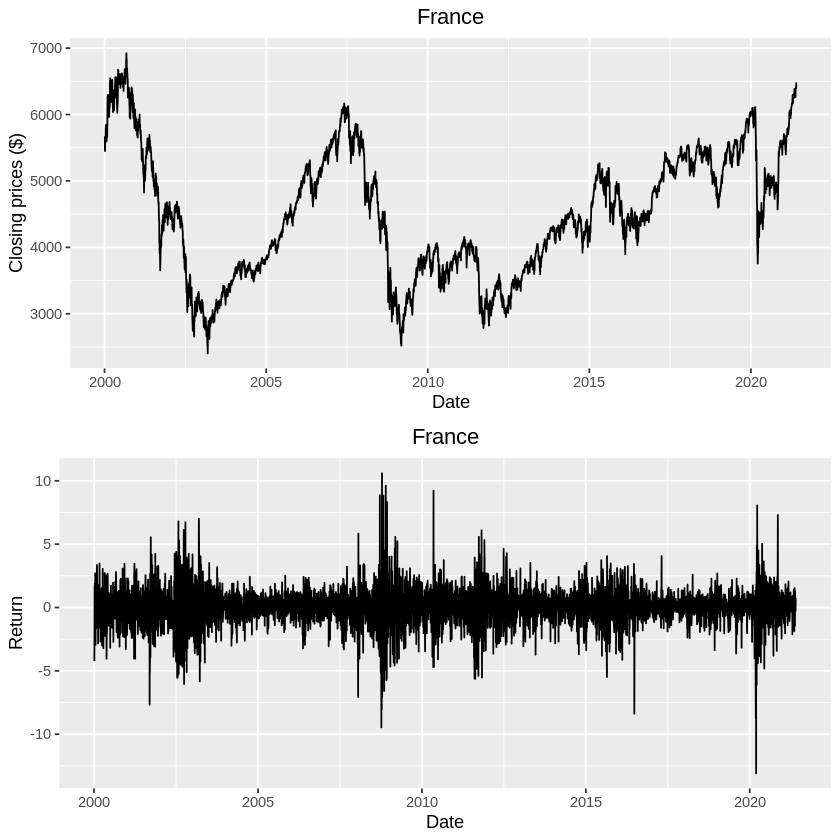

In [13]:
# Price chart
graph1 <- ggplot(FCHI.df,
                aes(x = index(FCHI.df), y = FCHI.df[,'FCHI.Close'])) +
                geom_line(color = "black") +
                ggtitle("France") +
                xlab("Date") +
                ylab("Closing prices ($)") +
                theme(plot.title = element_text(hjust = 0.5))

# Return chart
graph2 <- ggplot(FCHI.df,
                aes(x = index(FCHI.df), y = FCHI.df[,'FCHI.Return'])) +
                geom_line(color = "black") +
                ggtitle("France") +
                xlab("Date") +
                ylab("Return") +
                theme(plot.title = element_text(hjust = 0.5))

grid.arrange(graph1, graph2, ncol = 1, nrow = 2)

## 3. Descriptive statistic

In [14]:
# Packages
install.packages('moments')

library(moments)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘moments’


The following objects are masked from ‘package:PerformanceAnalytics’:

    kurtosis, skewness




**Descriptive statistic**

In [15]:
# mean
round(mean(FCHI.df$FCHI.Return), 3)                         

[1] 0.002

In [16]:
# sd
round(sd(FCHI.df$FCHI.Return), 3)                           

[1] 1.437

In [17]:
# skewness
round(skewness(FCHI.df$FCHI.Return), 3)                     

FCHI.Return 
     -0.206

In [18]:
# kurtosis
round(kurtosis(FCHI.df$FCHI.Return), 3)                     

FCHI.Return 
      9.384

In [19]:
# min
round(min(FCHI.df$FCHI.Return), 3)                          

[1] -13.098

In [20]:
# p5
round(quantile(FCHI.df$FCHI.Return, probs = 0.05), 3)       

5% 
-2.269

In [21]:
# p25
round(quantile(FCHI.df$FCHI.Return, probs = 0.25), 3)       

25% 
-0.653

In [22]:
# median
round(median(FCHI.df$FCHI.Return), 3)                       

[1] 0.04

In [23]:
# p75
round(quantile(FCHI.df$FCHI.Return, probs = 0.75), 3)       

75% 
0.714

In [24]:
# p95
round(quantile(FCHI.df$FCHI.Return, probs = 0.95), 3)       

95% 
2.097

In [25]:
# max
round(max(FCHI.df$FCHI.Return), 3)                          

[1] 10.595

In [26]:
# n observations
length(FCHI.df$FCHI.Return)                                 

[1] 5466

## 4. Series normality analysis

In [27]:
# Package
library(tseries)

In [28]:
jarque.bera.test(FCHI.df$FCHI.Return)


	Jarque Bera Test

data:  FCHI.df$FCHI.Return
X-squared = 9319.4, df = 2, p-value < 2.2e-16


## 5. Autocorrelation pattern analysis

In [29]:
# Packages
install.packages('TSA')
install.packages('aTSA')
install.packages('FinTS')

library(TSA)
library(aTSA)
library(FinTS)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘leaps’, ‘locfit’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘TSA’


The following objects are masked from ‘package:moments’:

    kurtosis, skewness


The following objects are masked from ‘package:PerformanceAnalytics’:

    kurtosis, skewness


The following objects are masked from ‘package:stats’:

    acf, arima


The following object is masked from ‘package:utils’:

    tar



Attaching package: ‘aTSA’


The following objects are masked from ‘package:tseries’:

    adf.test, kpss.test, pp.test


The following object is masked from ‘package:graphics’:

    identify




**McLeod-Li test for conditional heteroskedasticity (ARCH effect)**

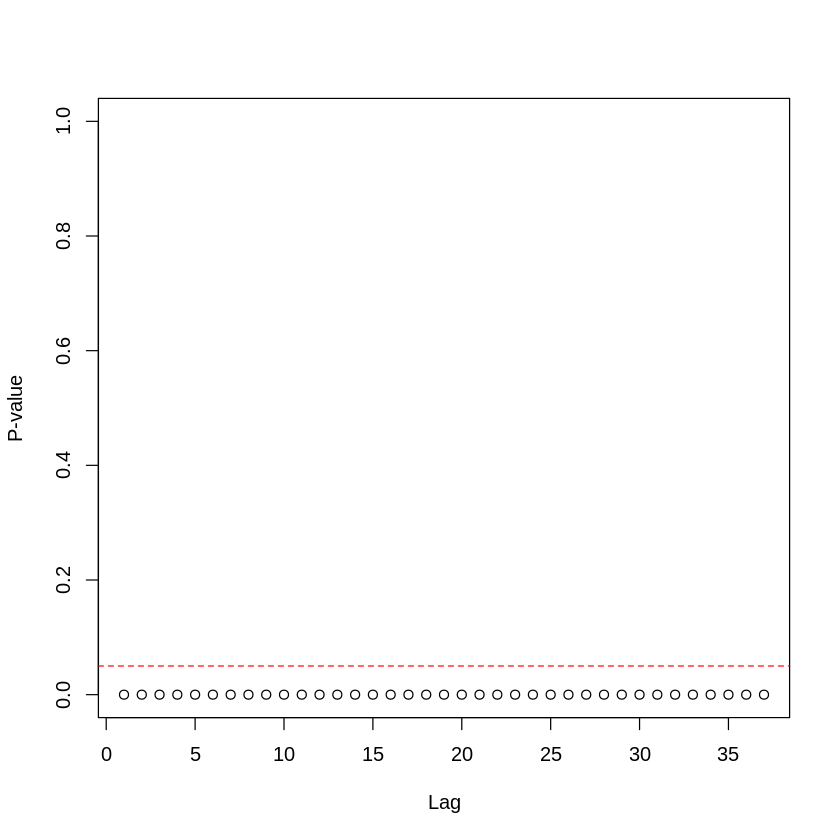

In [30]:
McLeod.Li.test(y = FCHI.df$FCHI.Return)
# p-valor < 1% => ARCH effect

**Lagrange Multiplier (LM) test for autoregressive conditional heteroscedasticity (ARCH)**

In [31]:
ArchTest(FCHI.df$FCHI.Return, demean = FALSE)


	ARCH LM-test; Null hypothesis: no ARCH effects

data:  FCHI.df$FCHI.Return
Chi-squared = 937.07, df = 12, p-value < 2.2e-16


## 6. GARCH model estimation

In [32]:
# Packages
install.packages('tidyverse')
install.packages('FinTS')
install.packages('texreg')
install.packages('rugarch')

library(tidyverse)
library(FinTS)
library(texreg)
library(rugarch)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘misc3d’, ‘truncnorm’, ‘FNN’, ‘kernlab’, ‘mclust’, ‘multicool’, ‘mvtnorm’, ‘plot3D’, ‘pracma’, ‘DistributionUtils’, ‘GeneralizedHyperbolic’, ‘Rsolnp’, ‘nloptr’, ‘ks’, ‘spd’, ‘chron’, ‘SkewHyperbolic’


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.2     ✔ dplyr   1.0.6
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ lubridate::as.difftime() masks base::as.difftime()
✖ dplyr::combine()         masks gridExtra::combine()
✖ lubridate::date()        masks 

In [33]:
# Parameters definition
ar_lag <- 0
ma_lag <- 0
arch_lag <- 1
garch_lag <- 1

**Linear GARCH model**

In [34]:
# Specification 
garch.spec <- ugarchspec(variance.model = list(model = "sGARCH",
                                               garchOrder = c(arch_lag, garch_lag)),
                         mean.model = list(armaOrder = c(ar_lag, ma_lag)),
                         distribution.model = "snorm")
# distribution.model = "snorm" => skew-normal distribution

In [35]:
# Estimation
garch.fit <- ugarchfit(spec = garch.spec, data = FCHI.df$FCHI.Return)
round(garch.fit@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
mu,0.0448,0.0135,3.3242,9e-04
omega,0.0234,0.0041,5.7730,0e+00
alpha1,0.1032,0.0088,11.6705,0e+00
beta1,0.8862,0.0092,95.9049,0e+00
skew,0.8890,0.0150,59.3198,0e+00


In [36]:
# Extracting variance series from the Linear GARCH model
var.garch <- ts(garch.fit@fit$sigma^2)
head(var.garch)

FCHI.df$FCHI.VolGARCH <- as.numeric(var.garch)
head(FCHI.df)

[1] 2.066153 3.744787 4.602265 4.137229 3.948641 3.879495

           FCHI.Close FCHI.Return FCHI.VolGARCH
2000-01-04    5672.02  -4.2346794      2.066153
2000-01-05    5479.70  -3.4494928      3.744787
2000-01-06    5450.11  -0.5414624      4.602265
2000-01-07    5539.61   1.6288310      4.137229
2000-01-10    5646.12   1.9044528      3.948641
2000-01-11    5613.90  -0.5722957      3.879495

**EGARCH model**

In [37]:
# Specification 
egarch.spec <- ugarchspec(variance.model = list(model = "eGARCH",
                                                garchOrder = c(arch_lag, garch_lag)),
                          mean.model = list(armaOrder = c(ar_lag, ma_lag)), 
                          distribution.model = "snorm")
# distribution.model = "snorm" => skew-normal distribution

In [38]:
# Estimation
egarch.fit <- ugarchfit(spec = egarch.spec, data = FCHI.df$FCHI.Return)
round(egarch.fit@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
mu,-0.0105,0.0120,-0.8766,0.3807
omega,0.0094,0.0022,4.3541,0.0000
alpha1,-0.1468,0.0072,-20.3408,0.0000
beta1,0.9794,0.0008,1222.9421,0.0000
gamma1,0.1063,0.0100,10.6834,0.0000
skew,0.8658,0.0150,57.6851,0.0000


In [39]:
# Extracting variance series from the EGARCH model
var.egarch <- ts(egarch.fit@fit$sigma^2)
head(var.egarch)

FCHI.df$FCHI.VolEGARCH <- as.numeric(var.egarch)
head(FCHI.df)

[1] 2.064440 3.968686 5.536581 5.247143 4.567945 3.959084

           FCHI.Close FCHI.Return FCHI.VolGARCH FCHI.VolEGARCH
2000-01-04    5672.02  -4.2346794      2.066153       2.064440
2000-01-05    5479.70  -3.4494928      3.744787       3.968686
2000-01-06    5450.11  -0.5414624      4.602265       5.536581
2000-01-07    5539.61   1.6288310      4.137229       5.247143
2000-01-10    5646.12   1.9044528      3.948641       4.567945
2000-01-11    5613.90  -0.5722957      3.879495       3.959084

**GJR-GARCH model**

In [40]:
# Specification 
gjrgarch.spec <- ugarchspec(variance.model = list(model = "gjrGARCH",
                                                  garchOrder = c(arch_lag, garch_lag)),
                            mean.model = list(armaOrder = c(ar_lag, ma_lag)), 
                            distribution.model = "snorm")
# distribution.model = "snorm" => skew-normal distribution

In [41]:
# Estimation
gjrgarch.fit <- ugarchfit(spec = gjrgarch.spec, data = FCHI.df$FCHI.Return)
round(gjrgarch.fit@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
mu,-0.0021,0.0134,-0.1578,0.8746
omega,0.0241,0.0034,7.1674,0.0000
alpha1,0.0000,0.0077,0.0000,1.0000
beta1,0.9019,0.0092,98.3718,0.0000
gamma1,0.1713,0.0141,12.1311,0.0000
skew,0.8686,0.0151,57.5822,0.0000


In [42]:
# Extracting variance series from the GJR-GARCH model
var.gjrgarch <- ts(gjrgarch.fit@fit$sigma^2)
head(var.gjrgarch)

FCHI.df$FCHI.VolGJRGARCH <- as.numeric(var.gjrgarch)
head(FCHI.df)

[1] 2.064305 4.954453 6.528185 5.961712 5.400982 4.895260

           FCHI.Close FCHI.Return FCHI.VolGARCH FCHI.VolEGARCH FCHI.VolGJRGARCH
2000-01-04    5672.02  -4.2346794      2.066153       2.064440         2.064305
2000-01-05    5479.70  -3.4494928      3.744787       3.968686         4.954453
2000-01-06    5450.11  -0.5414624      4.602265       5.536581         6.528185
2000-01-07    5539.61   1.6288310      4.137229       5.247143         5.961712
2000-01-10    5646.12   1.9044528      3.948641       4.567945         5.400982
2000-01-11    5613.90  -0.5722957      3.879495       3.959084         4.895260

## 7. Realized GARCH model estimation

In [43]:
# Specification
realgarch.spec <- ugarchspec(mean.model = list(armaOrder = c(ar_lag, ma_lag),
                                               include.mean = FALSE),
                             variance.model = list(model = 'realGARCH',
                                                   garchOrder = c(arch_lag, garch_lag)),
                             distribution.model = "snorm")
# distribution.model = "snorm" => skew-normal distribution)

**Realized Linear GARCH**

In [44]:
# Estimation
realgarch.fit <- ugarchfit(realgarch.spec, FCHI.df$FCHI.Return,
                          solver = 'hybrid',
                          realizedVol = FCHI.df$FCHI.VolGARCH)
round(realgarch.fit@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
omega,0.0131,0.0199,0.6606,0.5089
alpha1,0.9583,0.0264,36.2880,0.0000
beta1,0.0316,0.0136,2.3282,0.0199
eta11,0.0028,0.0020,1.4236,0.1546
eta21,0.0050,0.0010,4.7614,0.0000
delta,0.9945,0.0237,42.0371,0.0000
lambda,0.1443,0.0014,104.5556,0.0000
skew,0.8889,0.0147,60.3717,0.0000
xi,-0.0083,0.0205,-0.4037,0.6864


In [45]:
# Extracting variance series from the Realized Linear GARCH model
var.realgarch <- ts(realgarch.fit@fit$sigma^2)
head(var.realgarch)

FCHI.df$FCHI.VolRealGARCH <- as.numeric(var.realgarch)
head(FCHI.df)

[1] 2.064294 2.078172 3.675142 4.559493 4.145185 3.952012

           FCHI.Close FCHI.Return FCHI.VolGARCH FCHI.VolEGARCH FCHI.VolGJRGARCH
2000-01-04    5672.02  -4.2346794      2.066153       2.064440         2.064305
2000-01-05    5479.70  -3.4494928      3.744787       3.968686         4.954453
2000-01-06    5450.11  -0.5414624      4.602265       5.536581         6.528185
2000-01-07    5539.61   1.6288310      4.137229       5.247143         5.961712
2000-01-10    5646.12   1.9044528      3.948641       4.567945         5.400982
2000-01-11    5613.90  -0.5722957      3.879495       3.959084         4.895260
           FCHI.VolRealGARCH
2000-01-04          2.064294
2000-01-05          2.078172
2000-01-06          3.675142
2000-01-07          4.559493
2000-01-10          4.145185
2000-01-11          3.952012

**Realized EGARCH**

In [46]:
# Estimation
realegarch.fit <- ugarchfit(realgarch.spec, FCHI.df$FCHI.Return,
                            solver = 'hybrid',
                            realizedVol = FCHI.df$FCHI.VolEGARCH)
round(realegarch.fit@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
omega,0.0254,0.0198,1.2833,0.1994
alpha1,0.9762,0.0247,39.5747,0.0000
beta1,0.0030,0.0137,0.2190,0.8267
eta11,0.0059,0.0023,2.5475,0.0108
eta21,0.0109,0.0012,8.9392,0.0000
delta,1.0005,0.0212,47.1414,0.0000
lambda,0.1690,0.0016,104.5548,0.0000
skew,0.8775,0.0148,59.1407,0.0000
xi,-0.0198,0.0200,-0.9930,0.3207


In [47]:
# Extracting variance series from the Realized EGARCH model
var.realegarch <- ts(realegarch.fit@fit$sigma^2)
head(var.realegarch)

FCHI.df$FCHI.VolRealEGARCH <- as.numeric(var.realegarch)
head(FCHI.df)

[1] 2.064294 2.085952 3.948347 5.475275 5.200777 4.541822

           FCHI.Close FCHI.Return FCHI.VolGARCH FCHI.VolEGARCH FCHI.VolGJRGARCH
2000-01-04    5672.02  -4.2346794      2.066153       2.064440         2.064305
2000-01-05    5479.70  -3.4494928      3.744787       3.968686         4.954453
2000-01-06    5450.11  -0.5414624      4.602265       5.536581         6.528185
2000-01-07    5539.61   1.6288310      4.137229       5.247143         5.961712
2000-01-10    5646.12   1.9044528      3.948641       4.567945         5.400982
2000-01-11    5613.90  -0.5722957      3.879495       3.959084         4.895260
           FCHI.VolRealGARCH FCHI.VolRealEGARCH
2000-01-04          2.064294           2.064294
2000-01-05          2.078172           2.085952
2000-01-06          3.675142           3.948347
2000-01-07          4.559493           5.475275
2000-01-10          4.145185           5.200777
2000-01-11          3.952012           4.541822

**Realized GJR-GARCH**

In [48]:
# Estimation
realgjrgarch.fit <- ugarchfit(realgarch.spec, FCHI.df$FCHI.Return,
                              solver = 'hybrid',
                              realizedVol = FCHI.df$FCHI.VolGJRGARCH)
round(realgjrgarch.fit@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
omega,0.0251,0.0199,1.2611,0.2073
alpha1,0.9596,0.0252,38.0482,0.0000
beta1,0.0037,0.0136,0.2730,0.7849
eta11,0.0043,0.0024,1.8059,0.0709
eta21,0.0099,0.0013,7.6720,0.0000
delta,1.0169,0.0229,44.4639,0.0000
lambda,0.1747,0.0017,104.5541,0.0000
skew,0.8757,0.0149,58.8957,0.0000
xi,-0.0197,0.0205,-0.9599,0.3371


In [49]:
# Extracting variance series from the Realized GJR-GARCH model
var.realgjrgarch <- ts(realgjrgarch.fit@fit$sigma^2)
head(var.realgjrgarch)

FCHI.df$FCHI.VolRealGJRGARCH <- as.numeric(var.realgjrgarch)
head(FCHI.df)

[1] 2.064294 2.061312 4.775367 6.241989 5.726992 5.207409

           FCHI.Close FCHI.Return FCHI.VolGARCH FCHI.VolEGARCH FCHI.VolGJRGARCH
2000-01-04    5672.02  -4.2346794      2.066153       2.064440         2.064305
2000-01-05    5479.70  -3.4494928      3.744787       3.968686         4.954453
2000-01-06    5450.11  -0.5414624      4.602265       5.536581         6.528185
2000-01-07    5539.61   1.6288310      4.137229       5.247143         5.961712
2000-01-10    5646.12   1.9044528      3.948641       4.567945         5.400982
2000-01-11    5613.90  -0.5722957      3.879495       3.959084         4.895260
           FCHI.VolRealGARCH FCHI.VolRealEGARCH FCHI.VolRealGJRGARCH
2000-01-04          2.064294           2.064294             2.064294
2000-01-05          2.078172           2.085952             2.061312
2000-01-06          3.675142           3.948347             4.775367
2000-01-07          4.559493           5.475275             6.241989
2000-01-10          4.145185           5.200777             5.726992
2000-01-11          3.9520

## 8. Markov-Switching GARCH estimation

In [50]:
# Packages
install.packages('MSGARCH')

library(MSGARCH)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘coda’, ‘expm’, ‘fanplot’




2 regimes: low volatility and high volatility

**Linear MS GARCH**

In [51]:
# Specification
msgarch.spec <- CreateSpec(variance.spec = list(model = c("sGARCH")),
                           distribution.spec = list(distribution = c("snorm")),
                           switch.spec = list(K = 2))

In [52]:
# Estimation
msgarch.fit <- FitML(msgarch.spec, data = FCHI.df$FCHI.Return)    
summary(msgarch.fit)

Specification type: Markov-switching
Specification name: sGARCH_snorm sGARCH_snorm
Number of parameters in each variance model: 3 3
Number of parameters in each distribution: 1 1
------------------------------------------
Fixed parameters:
None
------------------------------------------
Across regime constrained parameters:
None
------------------------------------------
Fitted parameters:
         Estimate Std. Error  t value  Pr(>|t|)
alpha0_1   0.0004     0.0032   0.1224 4.513e-01
alpha1_1   0.0661     0.0174   3.7877 7.603e-05
beta_1     0.9161     0.0038 239.1996    <1e-16
xi_1       0.8996     0.0262  34.3043    <1e-16
alpha0_2   0.3001     0.1149   2.6108 4.516e-03
alpha1_2   0.2495     0.1968   1.2678 1.024e-01
beta_2     0.7457     0.0047 157.7133    <1e-16
xi_2       0.8611     0.0404  21.2905    <1e-16
P_1_1      0.7332     0.0373  19.6691    <1e-16
P_2_1      0.9193     0.2332   3.9425 4.032e-05
------------------------------------------
Transition matrix:
      t+1|k=1 t+1

In [53]:
# Extracting variance series from the MS GARCH model
var.msgarch <- ts(Volatility(msgarch.fit))
head(var.msgarch)

FCHI.df$FCHI.VolMSGARCH <- as.numeric(var.msgarch)
head(FCHI.df)

t=1      t=2      t=3      t=4      t=5      t=6 
3.765359 3.545075 2.614988 3.087046 2.689069 2.441523

           FCHI.Close FCHI.Return FCHI.VolGARCH FCHI.VolEGARCH FCHI.VolGJRGARCH
2000-01-04    5672.02  -4.2346794      2.066153       2.064440         2.064305
2000-01-05    5479.70  -3.4494928      3.744787       3.968686         4.954453
2000-01-06    5450.11  -0.5414624      4.602265       5.536581         6.528185
2000-01-07    5539.61   1.6288310      4.137229       5.247143         5.961712
2000-01-10    5646.12   1.9044528      3.948641       4.567945         5.400982
2000-01-11    5613.90  -0.5722957      3.879495       3.959084         4.895260
           FCHI.VolRealGARCH FCHI.VolRealEGARCH FCHI.VolRealGJRGARCH
2000-01-04          2.064294           2.064294             2.064294
2000-01-05          2.078172           2.085952             2.061312
2000-01-06          3.675142           3.948347             4.775367
2000-01-07          4.559493           5.475275             6.241989
2000-01-10          4.145185           5.200777             5.726992
2000-01-11          3.9520

**MS EGARCH**

In [54]:
# Specification
msegarch.spec <- CreateSpec(variance.spec = list(model = c("eGARCH")),
                            distribution.spec = list(distribution = c("snorm")),
                            switch.spec = list(K = 2))

In [55]:
# Estimation
msegarch.fit <- FitML(msegarch.spec, data = FCHI.df$FCHI.Return)    
summary(msegarch.fit)

Specification type: Markov-switching
Specification name: eGARCH_snorm eGARCH_snorm
Number of parameters in each variance model: 4 4
Number of parameters in each distribution: 1 1
------------------------------------------
Fixed parameters:
None
------------------------------------------
Across regime constrained parameters:
None
------------------------------------------
Fitted parameters:
         Estimate Std. Error  t value  Pr(>|t|)
alpha0_1  -0.0146     0.0041  -3.6085 1.540e-04
alpha1_1   0.1256     0.0132   9.5479    <1e-16
alpha2_1  -0.1846     0.0139 -13.2756    <1e-16
beta_1     0.9819     0.0033 299.7740    <1e-16
xi_1       0.8652     0.0264  32.7784    <1e-16
alpha0_2   0.0074     0.0022   3.3014 4.810e-04
alpha1_2   0.0203     0.0067   3.0487 1.149e-03
alpha2_2  -0.0599     0.0173  -3.4622 2.679e-04
beta_2     0.9952     0.0012 815.2670    <1e-16
xi_2       0.8187     0.0469  17.4541    <1e-16
P_1_1      0.7373     0.0386  19.0883    <1e-16
P_2_1      0.8756     0.1375   

In [56]:
# Extracting variance series from the MS EGARCH model
var.msegarch <- ts(Volatility(msegarch.fit))
head(var.msegarch)

FCHI.df$FCHI.VolMSEGARCH <- as.numeric(var.msegarch)
head(FCHI.df)

t=1      t=2      t=3      t=4      t=5      t=6 
1.192784 1.860985 2.237171 2.190422 2.036836 1.891863

           FCHI.Close FCHI.Return FCHI.VolGARCH FCHI.VolEGARCH FCHI.VolGJRGARCH
2000-01-04    5672.02  -4.2346794      2.066153       2.064440         2.064305
2000-01-05    5479.70  -3.4494928      3.744787       3.968686         4.954453
2000-01-06    5450.11  -0.5414624      4.602265       5.536581         6.528185
2000-01-07    5539.61   1.6288310      4.137229       5.247143         5.961712
2000-01-10    5646.12   1.9044528      3.948641       4.567945         5.400982
2000-01-11    5613.90  -0.5722957      3.879495       3.959084         4.895260
           FCHI.VolRealGARCH FCHI.VolRealEGARCH FCHI.VolRealGJRGARCH
2000-01-04          2.064294           2.064294             2.064294
2000-01-05          2.078172           2.085952             2.061312
2000-01-06          3.675142           3.948347             4.775367
2000-01-07          4.559493           5.475275             6.241989
2000-01-10          4.145185           5.200777             5.726992
2000-01-11          3.9520

**MS GJR-GARCH**

In [57]:
# Specification
msgjrgarch.spec <- CreateSpec(variance.spec = list(model = c("gjrGARCH")),
                              distribution.spec = list(distribution = c("snorm")),
                              switch.spec = list(K = 2))

In [58]:
# Estimation
msgjrgarch.fit <- FitML(msgjrgarch.spec, data = FCHI.df$FCHI.Return)    
summary(msgjrgarch.fit)

Specification type: Markov-switching
Specification name: gjrGARCH_snorm gjrGARCH_snorm
Number of parameters in each variance model: 4 4
Number of parameters in each distribution: 1 1
------------------------------------------
Fixed parameters:
None
------------------------------------------
Across regime constrained parameters:
None
------------------------------------------
Fitted parameters:
         Estimate Std. Error  t value  Pr(>|t|)
alpha0_1   0.0600     0.0097   6.1538 3.782e-10
alpha1_1   0.0000     0.0001   0.0504 4.799e-01
alpha2_1   0.2528     0.0417   6.0585 6.869e-10
beta_1     0.8099     0.0149  54.3070    <1e-16
xi_1       0.8355     0.0261  32.0365    <1e-16
alpha0_2   0.0530     0.0130   4.0677 2.374e-05
alpha1_2   0.0000     0.0004   0.0922 4.633e-01
alpha2_2   0.1408     0.0271   5.2037 9.768e-08
beta_2     0.9096     0.0054 169.0939    <1e-16
xi_2       0.9220     0.0272  33.9117    <1e-16
P_1_1      0.9975     0.0013 752.6279    <1e-16
P_2_1      0.0026     0.001

In [59]:
# Extracting variance series from the MS GJR-GARCH model
var.msgjrgarch <- ts(Volatility(msgjrgarch.fit))
head(var.msgjrgarch)

FCHI.df$FCHI.VolMSGJRGARCH <- as.numeric(var.msgjrgarch)
head(FCHI.df)

t=1      t=2      t=3      t=4      t=5      t=6 
1.435226 2.329000 2.658127 2.481141 2.312343 2.155181

           FCHI.Close FCHI.Return FCHI.VolGARCH FCHI.VolEGARCH FCHI.VolGJRGARCH
2000-01-04    5672.02  -4.2346794      2.066153       2.064440         2.064305
2000-01-05    5479.70  -3.4494928      3.744787       3.968686         4.954453
2000-01-06    5450.11  -0.5414624      4.602265       5.536581         6.528185
2000-01-07    5539.61   1.6288310      4.137229       5.247143         5.961712
2000-01-10    5646.12   1.9044528      3.948641       4.567945         5.400982
2000-01-11    5613.90  -0.5722957      3.879495       3.959084         4.895260
           FCHI.VolRealGARCH FCHI.VolRealEGARCH FCHI.VolRealGJRGARCH
2000-01-04          2.064294           2.064294             2.064294
2000-01-05          2.078172           2.085952             2.061312
2000-01-06          3.675142           3.948347             4.775367
2000-01-07          4.559493           5.475275             6.241989
2000-01-10          4.145185           5.200777             5.726992
2000-01-11          3.9520

## 9. Sample split: in-sample (70%) and out-sample (30%)

In [60]:
# Total number of lines 
nrow(FCHI.df)                

[1] 5466

In [61]:
# Cut-line
round(nrow(FCHI.df)*0.7, digits = 0)

[1] 3826

In [62]:
# In-sample
FCHI.df.in <- FCHI.df[1:round(nrow(FCHI.df)*0.7, digits = 0),]
dim(FCHI.df.in)

[1] 3826   11

In [63]:
# Out-sample
FCHI.df.out <- FCHI.df[(round(nrow(FCHI.df)*0.7, digits = 0)+1):nrow(FCHI.df),]
dim(FCHI.df.out)

[1] 1640   11

# 10. Forecast - GARCH models

In [64]:
# Packages
install.packages('Metrics')
install.packages('MLmetrics')
install.packages('multDM')
install.packages('MCS')
install.packages('sandwich')
install.packages('lmtest')
install.packages('forecast')

library(Metrics)
library(MLmetrics)
library(multDM)
library(MCS)
library(sandwich)
library(lmtest)
library(forecast)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘gtools’, ‘caTools’, ‘gplots’, ‘ROCR’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘timeSeries’, ‘fastICA’, ‘gss’, ‘stabledist’, ‘fGarch’, ‘fBasics’, ‘MTS’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘MLmetrics’


The following object is masked from ‘package:base’:

    Recall


Registered S3 methods overwritten by 'forecast':
  method       from
  fitted.Arima TSA 
  plot.Arima   TSA 


Attaching package

## (a) Linear GARCH

**Forecast**

In [65]:
# Model specification
garch.spec.pred <- garch.spec
setfixed(garch.spec.pred) <- as.list(coef(garch.fit))

In [66]:
# Model adjustment
garch.fit.pred <- ugarchfit(garch.spec,
                            FCHI.df$FCHI.Return,
                            out.sample = dim(FCHI.df.out)[1])

In [67]:
# Forecast calculated through adjustment
garch.pred.a <- ugarchforecast(garch.fit.pred,
                               n.ahead = 1,
                               n.roll = dim(FCHI.df.out)[1])

garch.forecast.a <- xts(sigma(garch.pred.a)[1,],
                       move(as.Date(names(sigma(garch.pred.a)[1,])), by = 1))

In [68]:
# Forecast calculated using specification
garch.pred.b <- ugarchforecast(garch.spec.pred,
                               n.ahead = 1,
                               n.roll = dim(FCHI.df.out)[1],
                               data = FCHI.df$FCHI.Return,
                               out.sample = dim(FCHI.df.out)[1])

garch.forecast.b <- xts(sigma(garch.pred.b)[1,],
                        move(as.Date(names(sigma(garch.pred.b)[1,])), by = 1))  

In [69]:
# Model filtering
garch.filt.pred <- ugarchfilter(garch.spec.pred,
                                data = FCHI.df$FCHI.Return,
                                n.old = nrow(FCHI.df) - dim(FCHI.df.out)[1])

garch.filt <- tail(sigma(garch.filt.pred), dim(FCHI.df.out)[1])                                 

In [70]:
# Comparative
colnames(garch.filt) <- 'filter'
colnames(garch.forecast.a) <- 'forecast1'
colnames(garch.forecast.b) <- 'forecast2'

garch.ftest <- cbind(garch.filt,
                    garch.forecast.a,
                    garch.forecast.b)
head(round(garch.ftest, digits = 4))

           filter forecast1 forecast2
2014-12-29 1.5542    1.5461    1.5542
2014-12-30 1.4787    1.4850    1.4787
2014-12-31 1.5073    1.5078    1.5073
2015-01-02 1.4398    1.4528    1.4398
2015-01-05 1.3744    1.3983    1.3744
2015-01-06 1.7033    1.6685    1.7033

In [71]:
sigma.garch.pred.a <- ts(garch.forecast.a[-1,])
sigma.garch.pred.b <- ts(garch.forecast.b[-1,])
sigma.garch.true <- ts(FCHI.df.out$FCHI.VolGARCH)

sigma.garch <- na.omit(cbind(sigma.garch.pred.a, 
                            sigma.garch.pred.b,
                            sigma.garch.true))
head(sigma.garch)

,sigma.garch.pred.a,sigma.garch.pred.b,sigma.garch.true
1,1.484965,1.478674,2.415459
2,1.507764,1.507279,2.186477
3,1.452780,1.439820,2.271889
4,1.398283,1.374379,2.073083
5,1.668523,1.703303,1.888917
6,1.608333,1.627449,2.901242


**Performance evaluation**

In [72]:
# Forecast Error - Forecast a
garch.error.a <- sigma.garch[,'sigma.garch.pred.a'] - sigma.garch[,'sigma.garch.true']
head(garch.error.a)

A Time Series:
[1] -0.9304933 -0.6787135 -0.8191084 -0.6748003 -0.2203938 -1.2929086

In [73]:
# Forecast Error - Forecast b
garch.error.b <- sigma.garch[,'sigma.garch.pred.b'] - sigma.garch[,'sigma.garch.true']
head(garch.error.b)

A Time Series:
[1] -0.9367845 -0.6791985 -0.8320684 -0.6987043 -0.1856137 -1.2737934

In [74]:
# Mean Square Error Loss - Forecast a
garch.mse.a <- MSE(sigma.garch[,'sigma.garch.pred.a'], 
                  sigma.garch[,'sigma.garch.true'])
round(garch.mse.a, digits = 3)     

[1] 4.268

In [75]:
# Mean Square Error Loss - Forecast b
garch.mse.b <- MSE(sigma.garch[,'sigma.garch.pred.b'],
                  sigma.garch[,'sigma.garch.true'])
round(garch.mse.b, digits = 3) 

[1] 4.234

In [76]:
# Mean Absolute Error Loss - Forecast a
garch.mae.a <- MAE(sigma.garch[,'sigma.garch.pred.a'], 
                  sigma.garch[,'sigma.garch.true'])
round(garch.mae.a, digits = 3)

[1] 0.676

In [77]:
# Mean Absolute Error Loss - Forecast b
garch.mae.b <- MAE(sigma.garch[,'sigma.garch.pred.b'], 
                  sigma.garch[,'sigma.garch.true'])
round(garch.mae.b, digits = 3)

[1] 0.674

In [78]:
# Root Mean Square Error Loss - Forecast a
garch.rmse.a <- RMSE(sigma.garch[,'sigma.garch.pred.a'], 
                    sigma.garch[,'sigma.garch.true'])
round(garch.rmse.a, digits = 3)

[1] 2.066

In [79]:
# Root Mean Square Error Loss - Forecast b
garch.rmse.b <- RMSE(sigma.garch[,'sigma.garch.pred.b'], 
                    sigma.garch[,'sigma.garch.true'])
round(garch.rmse.b, digits = 3)

[1] 2.058

In [80]:
# Quasi-likelihood loss function - forecast a
h <- sigma.garch[,'sigma.garch.true']

h.hat.a <- sigma.garch[,'sigma.garch.pred.a']     
garch.qlike.a <- mean(log(sqrt(h)) + h.hat.a/sqrt(h))
round(garch.qlike.a, digits = 5) 

[1] 1.06055

In [81]:
# Quasi-likelihood loss function - forecast b
h.hat.b <- sigma.garch[,'sigma.garch.pred.b']
garch.qlike.b <- mean(log(sqrt(h)) + h.hat.b/sqrt(h))
round(garch.qlike.b, digits = 5)   

[1] 1.04941

In [82]:
# Diebold-Mariano Test (accuracy test) - test 1
f.a <- sigma.garch[,'sigma.garch.pred.a']
f.b <- sigma.garch[,'sigma.garch.pred.b']
y <- sigma.garch[,'sigma.garch.true']

DM.test(f.a, f.b, y, loss.type = "SE", c = FALSE, H1 = "same")


	Diebold-Mariano test

data:  f.a and f.b and y
statistic = 1.9619, forecast horizon = 1, p-value = 0.04978
alternative hypothesis: Forecast f1 and f2 have different accuracy.


In [83]:
# Diebold-Mariano test for predictive accuracy - test 2
e.a <- garch.error.a
e.b <- garch.error.b

dm.test(e.a, e.b, alternative = "two.sided", h = 1, power = 2)


	Diebold-Mariano Test

data:  e.ae.b
DM = 1.9613, Forecast horizon = 1, Loss function power = 2, p-value =
0.05002
alternative hypothesis: two.sided


In [84]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast a
garch.qlike.a <- mean(LossVol(sigma.garch[,'sigma.garch.true'],
                              sigma.garch[,'sigma.garch.pred.a'],
                              which = "QLIKE"))
round(garch.qlike.a, digits = 3)

[1] 1.79

In [85]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast 1b
garch.qlike.b <- mean(LossVol(sigma.garch[,'sigma.garch.true'],
                              sigma.garch[,'sigma.garch.pred.b'],
                              which = "QLIKE"))
round(garch.qlike.b, digits = 3)

[1] 1.781

In [86]:
# Log loss / Cross-Entropy Loss -  forecast a
garch.logloss.a <- LogLoss(sigma.garch[,'sigma.garch.pred.a'],
                           sigma.garch[,'sigma.garch.true'])
round(garch.logloss.a, digits = 3)

[1] -28.242

In [87]:
# Log loss / Cross-Entropy Loss -  forecast b
garch.logloss.b <- LogLoss(sigma.garch[,'sigma.garch.pred.b'],
                           sigma.garch[,'sigma.garch.true'])
round(garch.logloss.b, digits = 3)

[1] -28.249

In [88]:
# Linear regression to assess forecast performance - forecast a
garch.model.a <- lm(sigma.garch.true ~ sigma.garch.pred.a, 
                    data = sigma.garch)
round(coeftest(garch.model.a, NeweyWest(garch.model.a,
                                        lag = bwNeweyWest(garch.model.a),
                                        prewhite = F)), 3)
round(summary(garch.model.a)$adj.r.squared, 3)


t test of coefficients:

                   Estimate Std. Error t value  Pr(>|t|)    
(Intercept)          -3.007      0.613  -4.907 < 2.2e-16 ***
sigma.garch.pred.a    4.039      0.580   6.964 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.844

In [89]:
# Linear regression to assess forecast performance - forecast b
garch.model.b <- lm(sigma.garch.true ~ sigma.garch.pred.b, 
                    data = sigma.garch)
round(coeftest(garch.model.b, NeweyWest(garch.model.b,
                                        lag = bwNeweyWest(garch.model.b),
                                        prewhite = F)), 3)
round(summary(garch.model.b)$adj.r.squared, 3)


t test of coefficients:

                   Estimate Std. Error t value  Pr(>|t|)    
(Intercept)          -2.898      0.581  -4.990 < 2.2e-16 ***
sigma.garch.pred.b    3.978      0.555   7.166 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.848

##(b) EGARCH

**Forecast**

In [90]:
# Model specification
egarch.spec.pred <- egarch.spec
setfixed(egarch.spec.pred) <- as.list(coef(egarch.fit))

In [91]:
# Model adjustment
egarch.fit.pred <- ugarchfit(egarch.spec,
                             FCHI.df$FCHI.Return,
                             out.sample = dim(FCHI.df.out)[1])

In [92]:
# Forecast calculated through adjustment
egarch.pred.a <- ugarchforecast(egarch.fit.pred,
                                n.ahead = 1,
                                n.roll = dim(FCHI.df.out)[1])

egarch.forecast.a <- xts(sigma(egarch.pred.a)[1,],
                         move(as.Date(names(sigma(egarch.pred.a)[1,])), by = 1))

In [93]:
# Forecast calculated using specification
egarch.pred.b <- ugarchforecast(egarch.spec.pred,
                                n.ahead = 1,
                                n.roll = dim(FCHI.df.out)[1],
                                data = FCHI.df$FCHI.Return,
                                out.sample = dim(FCHI.df.out)[1])

egarch.forecast.b <- xts(sigma(egarch.pred.b)[1,],
                         move(as.Date(names(sigma(egarch.pred.b)[1,])), by = 1))               

In [94]:
# Model filtering
egarch.filt.pred <- ugarchfilter(egarch.spec.pred,
                                data = FCHI.df$FCHI.Return,
                                n.old = nrow(FCHI.df) - dim(FCHI.df.out)[1])

egarch.filt <- tail(sigma(egarch.filt.pred), dim(FCHI.df.out)[1]) 

In [95]:
# Comparative
colnames(egarch.filt) <- 'filter'
colnames(egarch.forecast.a) <- 'forecast1'
colnames(egarch.forecast.b) <- 'forecast2'

egarch.ftest <- cbind(egarch.filt, 
                      egarch.forecast.a,
                      egarch.forecast.b)
head(round(egarch.ftest, digits = 4))

           filter forecast1 forecast2
2014-12-29 1.3302    1.3178    1.3302
2014-12-30 1.2633    1.2576    1.2633
2014-12-31 1.4325    1.4172    1.4325
2015-01-02 1.3568    1.3483    1.3568
2015-01-05 1.3564    1.3538    1.3564
2015-01-06 1.7758    1.7393    1.7758

In [96]:
sigma.egarch.pred.a <- ts(egarch.forecast.a[-1,])
sigma.egarch.pred.b <- ts(egarch.forecast.b[-1,])
sigma.egarch.true <- ts(FCHI.df.out$FCHI.VolEGARCH)

sigma.egarch <- na.omit(cbind(sigma.egarch.pred.a,
                              sigma.egarch.pred.b,
                              sigma.egarch.true))
head(sigma.egarch)

,sigma.egarch.pred.a,sigma.egarch.pred.b,sigma.egarch.true
1,1.257626,1.263281,1.769318
2,1.417210,1.432525,1.595879
3,1.348333,1.356777,2.052127
4,1.353842,1.356425,1.840844
5,1.739317,1.775794,1.839888
6,1.745876,1.772433,3.153443


**Performance evaluation**

In [97]:
# Forecast Error - Forecast a
egarch.error.a <- sigma.egarch[,'sigma.egarch.pred.a'] - sigma.egarch[,'sigma.egarch.true']
head(egarch.error.a)

A Time Series:
[1] -0.5116922 -0.1786696 -0.7037940 -0.4870026 -0.1005709 -1.4075671

In [98]:
# Forecast Error - Forecast b
egarch.error.b <- sigma.egarch[,'sigma.egarch.pred.b'] - sigma.egarch[,'sigma.egarch.true']
head(egarch.error.b)

A Time Series:
[1] -0.50603696 -0.16335457 -0.69534974 -0.48441963 -0.06409433 -1.38101054

In [99]:
# Mean Square Error Loss - Forecast a
egarch.mse.a <- MSE(sigma.egarch[,'sigma.egarch.pred.a'],
                    sigma.egarch[,'sigma.egarch.true'])
round(egarch.mse.a, digits = 3)     

[1] 3.492

In [100]:
# Mean Square Error Loss - Forecast b
egarch.mse.b <- MSE(sigma.egarch[,'sigma.egarch.pred.b'],
                    sigma.egarch[,'sigma.egarch.true'])
round(egarch.mse.b, digits = 3) 

[1] 3.469

In [101]:
# Mean Absolute Error Loss - Forecast a
egarch.mae.a <- MAE(sigma.egarch[,'sigma.egarch.pred.a'],
                    sigma.egarch[,'sigma.egarch.true'])
round(egarch.mae.a, digits = 3)

[1] 0.631

In [102]:
# Mean Absolute Error Loss - Forecast b
egarch.mae.b <- MAE(sigma.egarch[,'sigma.egarch.pred.b'],
                    sigma.egarch[,'sigma.egarch.true'])
round(egarch.mae.b, digits = 3)

[1] 0.632

In [103]:
# Root Mean Square Error Loss - Forecast a
egarch.rmse.a <- RMSE(sigma.egarch[,'sigma.egarch.pred.a'],
                      sigma.egarch[,'sigma.egarch.true'])
round(egarch.rmse.a, digits = 3)

[1] 1.869

In [104]:
# Root Mean Square Error Loss - Forecast b
egarch.rmse.b <- RMSE(sigma.egarch[,'sigma.egarch.pred.b'],
                      sigma.egarch[,'sigma.egarch.true'])
round(egarch.rmse.b, digits = 3)

[1] 1.862

In [105]:
# Quasi-likelihood loss function - forecast a
h <- sigma.egarch[,'sigma.egarch.true']

h.hat.a <- sigma.egarch[,'sigma.egarch.pred.a']     
egarch.qlike.a <- mean(log(sqrt(h)) + h.hat.a/sqrt(h))
round(egarch.qlike.a, digits = 5) 

[1] 1.01113

In [106]:
# Quasi-likelihood loss function - forecast b
h.hat.b <- sigma.egarch[,'sigma.egarch.pred.b']
egarch.qlike.b <- mean(log(sqrt(h)) + h.hat.b/sqrt(h))
round(egarch.qlike.b, digits = 5) 

[1] 1.0111

In [107]:
# Diebold-Mariano Test (accuracy test) - test 1
f.a <- sigma.egarch[,'sigma.egarch.pred.a']
f.b <- sigma.egarch[,'sigma.egarch.pred.b']
y <- sigma.egarch[,'sigma.egarch.true']

DM.test(f.a, f.b, y, loss.type = "SE", c = FALSE, H1 = "same")


	Diebold-Mariano test

data:  f.a and f.b and y
statistic = 2.4725, forecast horizon = 1, p-value = 0.01342
alternative hypothesis: Forecast f1 and f2 have different accuracy.


In [108]:
# Diebold-Mariano test for predictive accuracy - test 2
e.a <- egarch.error.a
e.b <- egarch.error.b

dm.test(e.a, e.b, alternative = "two.sided", h = 1, power = 2)


	Diebold-Mariano Test

data:  e.ae.b
DM = 2.4718, Forecast horizon = 1, Loss function power = 2, p-value =
0.01355
alternative hypothesis: two.sided


In [109]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast a
egarch.qlike.a <- mean(LossVol(sigma.egarch[,'sigma.egarch.true'],
                              sigma.egarch[,'sigma.egarch.pred.a'],
                              which = "QLIKE"))
round(egarch.qlike.a, digits = 3)

[1] 1.622

In [110]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast b
egarch.qlike.b <- mean(LossVol(sigma.egarch[,'sigma.egarch.true'],
                              sigma.egarch[,'sigma.egarch.pred.b'],
                              which = "QLIKE"))
round(egarch.qlike.b, digits = 3)

[1] 1.617

In [111]:
# Log loss / Cross-Entropy Loss -  forecast a
egarch.logloss.a <- LogLoss(sigma.egarch[,'sigma.egarch.pred.a'],
                            sigma.egarch[,'sigma.egarch.true'])
round(egarch.logloss.a, digits = 3)

[1] -26.049

In [112]:
# Log loss / Cross-Entropy Loss -  forecast b
egarch.logloss.b <- LogLoss(sigma.egarch[,'sigma.egarch.pred.b'],
                            sigma.egarch[,'sigma.egarch.true'])
round(egarch.logloss.b, digits = 3)

[1] -26.066

In [113]:
# Linear regression to assess forecast performance - forecast a
egarch.model.a <- lm(sigma.egarch.true ~ sigma.egarch.pred.a, 
                    data = sigma.egarch)
round(coeftest(egarch.model.a, NeweyWest(egarch.model.a,
                                        lag = bwNeweyWest(egarch.model.a),
                                        prewhite = F)), 3)
round(summary(egarch.model.a)$adj.r.squared, 3)


t test of coefficients:

                    Estimate Std. Error t value  Pr(>|t|)    
(Intercept)           -2.536      0.605  -4.192 < 2.2e-16 ***
sigma.egarch.pred.a    3.688      0.593   6.224 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.809

In [114]:
# Linear regression to assess forecast performance - forecast b
egarch.model.b <- lm(sigma.egarch.true ~ sigma.egarch.pred.b, 
                    data = sigma.egarch)
round(coeftest(egarch.model.b, NeweyWest(egarch.model.b,
                                        lag = bwNeweyWest(egarch.model.b),
                                        prewhite = F)), 3)
round(summary(egarch.model.b)$adj.r.squared, 3)


t test of coefficients:

                    Estimate Std. Error t value  Pr(>|t|)    
(Intercept)           -2.512      0.585  -4.294 < 2.2e-16 ***
sigma.egarch.pred.b    3.666      0.573   6.396 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.814

##(c) GJR-GARCH

**Forecast**

In [115]:
# Model specification
gjrgarch.spec.pred <- gjrgarch.spec
setfixed(gjrgarch.spec.pred) <- as.list(coef(gjrgarch.fit))

In [117]:
# Model adjustment
gjrgarch.fit.pred <- ugarchfit(gjrgarch.spec,
                              FCHI.df$FCHI.Return,
                              out.sample = dim(FCHI.df.out)[1])

In [118]:
# Forecast calculated through adjustment
gjrgarch.pred.a <- ugarchforecast(gjrgarch.fit.pred,
                                 n.ahead = 1,
                                 n.roll = dim(FCHI.df.out)[1])

gjrgarch.forecast.a <- xts(sigma(gjrgarch.pred.a)[1,],
                           move(as.Date(names(sigma(gjrgarch.pred.a)[1,])), by = 1))

In [119]:
# Forecast calculated using specification
gjrgarch.pred.b <- ugarchforecast(gjrgarch.spec.pred,
                                  n.ahead = 1,
                                  n.roll = dim(FCHI.df.out)[1],
                                  data = FCHI.df$FCHI.Return,
                                  out.sample = dim(FCHI.df.out)[1])

gjrgarch.forecast.b <- xts(sigma(gjrgarch.pred.b)[1,],
                           move(as.Date(names(sigma(gjrgarch.pred.b)[1,])), by = 1)) 

In [121]:
# Model filtering
gjrgarch.filt.pred <- ugarchfilter(gjrgarch.spec.pred,
                                   data = FCHI.df$FCHI.Return,
                                   n.old = nrow(FCHI.df) - dim(FCHI.df.out)[1])

gjrgarch.filt <- tail(sigma(gjrgarch.filt.pred), dim(FCHI.df.out)[1]) 

In [122]:
# Comparative
colnames(gjrgarch.filt) <- 'filter'
colnames(gjrgarch.forecast.a) <- 'forecast1'
colnames(gjrgarch.forecast.b) <- 'forecast2'

gjrgarch.ftest <- cbind(gjrgarch.filt, 
                        gjrgarch.forecast.a,
                        gjrgarch.forecast.b)
head(round(gjrgarch.ftest, digits = 4))

           filter forecast1 forecast2
2014-12-29 1.4301    1.4305    1.4301
2014-12-30 1.3670    1.3747    1.3670
2014-12-31 1.4826    1.4757    1.4826
2015-01-02 1.4165    1.4175    1.4165
2015-01-05 1.3685    1.3746    1.3685
2015-01-06 1.9122    1.8627    1.9122

In [123]:
sigma.gjrgarch.pred.a <- ts(gjrgarch.forecast.a[-1,])
sigma.gjrgarch.pred.b <- ts(gjrgarch.forecast.b[-1,])
sigma.gjrgarch.true <- ts(FCHI.df.out$FCHI.VolGJRGARCH)

sigma.gjrgarch <- na.omit(cbind(sigma.gjrgarch.pred.a,
                                sigma.gjrgarch.pred.b,
                                sigma.gjrgarch.true))
head(sigma.gjrgarch)

,sigma.gjrgarch.pred.a,sigma.gjrgarch.pred.b,sigma.gjrgarch.true
1,1.374720,1.367035,2.045315
2,1.475663,1.482557,1.868785
3,1.417543,1.416499,2.197976
4,1.374622,1.368528,2.006469
5,1.862676,1.912210,1.872868
6,1.804374,1.844086,3.656548


**Performance evaluation**

In [124]:
# Forecast Error - Forecast a
gjrgarch.error.a <- sigma.gjrgarch[,'sigma.gjrgarch.pred.a'] - sigma.gjrgarch[,'sigma.gjrgarch.true']
head(gjrgarch.error.a)

A Time Series:
[1] -0.67059530 -0.39312147 -0.78043331 -0.63184742 -0.01019204 -1.85217422

In [125]:
# Forecast Error - Forecast b
gjrgarch.error.b <- sigma.gjrgarch[,'sigma.gjrgarch.pred.b'] - sigma.gjrgarch[,'sigma.gjrgarch.true']
head(gjrgarch.error.b)

A Time Series:
[1] -0.67828047 -0.38622722 -0.78147727 -0.63794181  0.03934262 -1.81246197

In [126]:
# Mean Square Error Loss - Forecast a
gjrgarch.mse.a <- MSE(sigma.gjrgarch[,'sigma.gjrgarch.pred.a'],
                      sigma.gjrgarch[,'sigma.gjrgarch.true'])
round(gjrgarch.mse.a, digits = 3)     

[1] 9.033

In [127]:
# Mean Square Error Loss - Forecast b
gjrgarch.mse.b <- MSE(sigma.gjrgarch[,'sigma.gjrgarch.pred.b'],
                      sigma.gjrgarch[,'sigma.gjrgarch.true'])
round(gjrgarch.mse.b, digits = 3) 

[1] 8.963

In [128]:
# Mean Absolute Error Loss - Forecast a
gjrgarch.mae.a <- MAE(sigma.gjrgarch[,'sigma.gjrgarch.pred.a'],
                      sigma.gjrgarch[,'sigma.gjrgarch.true'])
round(gjrgarch.mae.a, digits = 3)

[1] 0.842

In [129]:
# Mean Absolute Error Loss - Forecast b
gjrgarch.mae.b <- MAE(sigma.gjrgarch[,'sigma.gjrgarch.pred.b'],
                      sigma.gjrgarch[,'sigma.gjrgarch.true'])
round(gjrgarch.mae.b, digits = 3)

[1] 0.834

In [130]:
# Root Mean Square Error Loss - Forecast a
gjrgarch.rmse.a <- RMSE(sigma.gjrgarch[,'sigma.gjrgarch.pred.a'],
                        sigma.gjrgarch[,'sigma.gjrgarch.true'])
round(gjrgarch.rmse.a, digits = 3)

[1] 3.005

In [131]:
# Root Mean Square Error Loss - Forecast b
gjrgarch.rmse.b <- RMSE(sigma.gjrgarch[,'sigma.gjrgarch.pred.b'],
                        sigma.gjrgarch[,'sigma.gjrgarch.true'])
round(gjrgarch.rmse.b, digits = 3)

[1] 2.994

In [132]:
# Quasi-likelihood loss function - forecast a
h <- sigma.gjrgarch[,'sigma.gjrgarch.true']

h.hat.a <- sigma.gjrgarch[,'sigma.gjrgarch.pred.a']     
gjrgarch.qlike.a <- mean(log(sqrt(h)) + h.hat.a/sqrt(h))
round(gjrgarch.qlike.a, digits = 5) 

[1] 1.046

In [133]:
# Quasi-likelihood loss function - forecast b
h.hat.b <- sigma.gjrgarch[,'sigma.gjrgarch.pred.b']
gjrgarch.qlike.b <- mean(log(sqrt(h)) + h.hat.b/sqrt(h))
round(gjrgarch.qlike.b, digits = 5) 

[1] 1.03194

In [135]:
# Diebold-Mariano Test (accuracy test) - test 1
f.a <- sigma.gjrgarch[,'sigma.gjrgarch.pred.a']
f.b <- sigma.gjrgarch[,'sigma.gjrgarch.pred.b']
y <- sigma.gjrgarch[,'sigma.gjrgarch.true']

DM.test(f.a, f.b, y, loss.type = "SE", c = FALSE, H1 = "same")


	Diebold-Mariano test

data:  f.a and f.b and y
statistic = 2.8417, forecast horizon = 1, p-value = 0.004488
alternative hypothesis: Forecast f1 and f2 have different accuracy.


In [136]:
# Diebold-Mariano test for predictive accuracy - test 2
e.a <- gjrgarch.error.a
e.b <- gjrgarch.error.b

dm.test(e.a, e.b, alternative = "two.sided", h = 1, power = 2)


	Diebold-Mariano Test

data:  e.ae.b
DM = 2.8408, Forecast horizon = 1, Loss function power = 2, p-value =
0.004555
alternative hypothesis: two.sided


In [137]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast a
gjrgarch.qlike.a <- mean(LossVol(sigma.gjrgarch[,'sigma.gjrgarch.true'],
                                 sigma.gjrgarch[,'sigma.gjrgarch.pred.a'],
                                 which = "QLIKE"))
round(gjrgarch.qlike.a, digits = 3)

[1] 1.921

In [138]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast b
gjrgarch.qlike.b <- mean(LossVol(sigma.gjrgarch[,'sigma.gjrgarch.true'],
                                 sigma.gjrgarch[,'sigma.gjrgarch.pred.b'],
                                 which = "QLIKE"))
round(gjrgarch.qlike.b, digits = 3)

[1] 1.896

In [139]:
# Log loss / Cross-Entropy Loss -  forecast a
gjrgarch.logloss.a <- LogLoss(sigma.gjrgarch[,'sigma.gjrgarch.pred.a'],
                              sigma.gjrgarch[,'sigma.gjrgarch.true'])
round(gjrgarch.logloss.a, digits = 3)

[1] -33.799

In [140]:
# Log loss / Cross-Entropy Loss -  forecast b
gjrgarch.logloss.b <- LogLoss(sigma.gjrgarch[,'sigma.gjrgarch.pred.b'],
                              sigma.gjrgarch[,'sigma.gjrgarch.true'])
round(gjrgarch.logloss.b, digits = 3)

[1] -33.782

In [141]:
# Linear regression to assess forecast performance - forecast a
gjrgarch.model.a <- lm(sigma.gjrgarch.true ~ sigma.gjrgarch.pred.a, 
                      data = sigma.gjrgarch)
round(coeftest(gjrgarch.model.a, NeweyWest(gjrgarch.model.a,
                                          lag = bwNeweyWest(gjrgarch.model.a),
                                          prewhite = F)), 3)
round(summary(gjrgarch.model.a)$adj.r.squared, 3)


t test of coefficients:

                      Estimate Std. Error t value  Pr(>|t|)    
(Intercept)             -3.731      0.812  -4.596 < 2.2e-16 ***
sigma.gjrgarch.pred.a    4.775      0.768   6.217 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.818

In [142]:
# Linear regression to assess forecast performance - forecast b
gjrgarch.model.b <- lm(sigma.gjrgarch.true ~ sigma.gjrgarch.pred.b, 
                      data = sigma.gjrgarch)
round(coeftest(gjrgarch.model.b, NeweyWest(gjrgarch.model.b,
                                          lag = bwNeweyWest(gjrgarch.model.b),
                                          prewhite = F)), 3)
round(summary(gjrgarch.model.b)$adj.r.squared, 3)


t test of coefficients:

                      Estimate Std. Error t value  Pr(>|t|)    
(Intercept)             -3.555      0.776  -4.579 < 2.2e-16 ***
sigma.gjrgarch.pred.b    4.661      0.743   6.276 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.818

#11. Forecast - Realized GARCH models

##(a) Realized Linear GARCH

**Forecast**

In [143]:
# Model specification
realgarch.spec.pred <- realgarch.spec
setfixed(realgarch.spec.pred) <- as.list(coef(realgarch.fit))

In [144]:
# Model adjustment
realgarch.fit.pred <- ugarchfit(realgarch.spec,
                                FCHI.df$FCHI.Return,
                                out.sample = dim(FCHI.df.out)[1],
                                solver = 'hybrid',
                                realizedVol = FCHI.df$FCHI.VolGARCH)

In [145]:
# Forecast calculated through adjustment
realgarch.pred.a <- ugarchforecast(realgarch.fit.pred,
                                   n.ahead = 1,
                                   n.roll = dim(FCHI.df.out)[1])

realgarch.forecast.a <- xts(sigma(realgarch.pred.a)[1,],
                            move(as.Date(names(sigma(realgarch.pred.a)[1,])), by = 1))

In [146]:
# Forecast calculated using specification
realgarch.pred.b <- ugarchforecast(realgarch.spec.pred, 
                                   n.ahead = 1, 
                                   n.roll = dim(FCHI.df.out)[1], 
                                   data = FCHI.df$FCHI.Return, 
                                   out.sample = dim(FCHI.df.out)[1], 
                                   realizedVol = FCHI.df$FCHI.VolRealGARCH)

realgarch.forecast.b <- xts(sigma(realgarch.pred.b)[1,],
                            move(as.Date(names(sigma(realgarch.pred.b)[1,])), by = 1))

In [147]:
# Model filtering
realgarch.filt.pred <- ugarchfilter(realgarch.spec.pred,
                                    data = FCHI.df$FCHI.Return,
                                    n.old = nrow(FCHI.df) - dim(FCHI.df.out)[1],
                                    realizedVol = FCHI.df$FCHI.VolRealGARCH)

realgarch.filt <- tail(sigma(realgarch.filt.pred), dim(FCHI.df.out)[1])

In [148]:
# Comparative
colnames(realgarch.filt) <- 'filter'
colnames(realgarch.forecast.a) <- 'forecast1'
colnames(realgarch.forecast.b) <- 'forecast2'

realgarch.ftest <- cbind(realgarch.filt,
                        realgarch.forecast.a,
                        realgarch.forecast.b)
head(round(realgarch.ftest, digits = 4))

           filter forecast1 forecast2
2014-12-29 1.6752    1.6258    1.6710
2014-12-30 1.6420    1.5501    1.6331
2014-12-31 1.5659    1.4761    1.5574
2015-01-02 1.4914    1.5056    1.4840
2015-01-05 1.5133    1.4354    1.5072
2015-01-06 1.4524    1.3749    1.4480

In [149]:
sigma.realgarch.pred.a <- ts(realgarch.forecast.a[-1,])
sigma.realgarch.pred.b <- ts(realgarch.forecast.b[-1,])
sigma.realgarch.true <- ts(FCHI.df.out$FCHI.VolRealGARCH)

sigma.realgarch <- na.omit(cbind(sigma.realgarch.pred.a,
                                sigma.realgarch.pred.b,
                                sigma.realgarch.true))
head(sigma.realgarch)

,sigma.realgarch.pred.a,sigma.realgarch.pred.b,sigma.realgarch.true
1,1.550065,1.633138,2.683820
2,1.476078,1.557421,2.433861
3,1.505649,1.484011,2.205470
4,1.435415,1.507232,2.280848
5,1.374947,1.447964,2.091439
6,1.681136,1.385371,1.907807


**Performance evaluation**

In [150]:
# Forecast Error - Forecast a
realgarch.error.a <- sigma.realgarch[,'sigma.realgarch.pred.a'] - sigma.realgarch[,'sigma.realgarch.true']
head(realgarch.error.a)

A Time Series:
[1] -1.1337551 -0.9577834 -0.6998211 -0.8454337 -0.7164913 -0.2266712

In [151]:
# Forecast Error - Forecast b
realgarch.error.b <- sigma.realgarch[,'sigma.realgarch.pred.b'] - sigma.realgarch[,'sigma.realgarch.true']
head(realgarch.error.b)

A Time Series:
[1] -1.0506822 -0.8764397 -0.7214593 -0.7736159 -0.6434746 -0.5224364

In [152]:
# Mean Square Error Loss - Forecast a
realgarch.mse.a <- MSE(sigma.realgarch[,'sigma.realgarch.pred.a'],
                      sigma.realgarch[,'sigma.realgarch.true'])
round(realgarch.mse.a, digits = 3)

[1] 4.103

In [153]:
# Mean Square Error Loss - Forecast b
realgarch.mse.b <- MSE(sigma.realgarch[,'sigma.realgarch.pred.b'],
                      sigma.realgarch[,'sigma.realgarch.true'])
round(realgarch.mse.b, digits = 3)

[1] 4.046

In [154]:
# Mean Absolute Error Loss - Forecast a
realgarch.mae.a <- MAE(sigma.realgarch[,'sigma.realgarch.pred.a'],
                      sigma.realgarch[,'sigma.realgarch.true'])
round(realgarch.mae.a, digits = 3)

[1] 0.672

In [155]:
# Mean Absolute Error Loss - Forecast b
realgarch.mae.b <- MAE(sigma.realgarch[,'sigma.realgarch.pred.b'],
                      sigma.realgarch[,'sigma.realgarch.true'])
round(realgarch.mae.b, digits = 3)

[1] 0.66

In [156]:
# Root Mean Square Error Loss - Forecast a
realgarch.rmse.a <- RMSE(sigma.realgarch[,'sigma.realgarch.pred.a'],
                        sigma.realgarch[,'sigma.realgarch.true'])
round(realgarch.rmse.a, digits = 3)

[1] 2.026

In [157]:
# Root Mean Square Error Loss - Forecast b
realgarch.rmse.b <- RMSE(sigma.realgarch[,'sigma.realgarch.pred.b'],
                        sigma.realgarch[,'sigma.realgarch.true'])
round(realgarch.rmse.b, digits = 3)

[1] 2.012

In [158]:
# Quasi-likelihood loss function - forecast a
h <- sigma.realgarch[,'sigma.realgarch.true']

h.hat.a <- sigma.realgarch[,'sigma.realgarch.pred.a']     
realgarch.qlike.a <- mean(log(sqrt(h)) + h.hat.a/sqrt(h))
round(realgarch.qlike.a, digits = 5)

[1] 1.05259

In [159]:
# Quasi-likelihood loss function - forecast b
h.hat.b <- sigma.realgarch[,'sigma.realgarch.pred.b']
realgarch.qlike.b <- mean(log(sqrt(h)) + h.hat.b/sqrt(h))
round(realgarch.qlike.b, digits = 5)

[1] 1.05542

In [160]:
# Diebold-Mariano Test (accuracy test) - test 1
f.a <- sigma.realgarch[,'sigma.realgarch.pred.a']
f.b <- sigma.realgarch[,'sigma.realgarch.pred.b']
y <- sigma.realgarch[,'sigma.realgarch.true']

DM.test(f.a, f.b, y, loss.type = "SE", c = FALSE, H1 = "same")


	Diebold-Mariano test

data:  f.a and f.b and y
statistic = 2.7439, forecast horizon = 1, p-value = 0.006071
alternative hypothesis: Forecast f1 and f2 have different accuracy.


In [161]:
# Diebold-Mariano test for predictive accuracy - test 2
e.a <- realgarch.error.a
e.b <- realgarch.error.b

dm.test(e.a, e.b, alternative = "two.sided", h = 1, power = 2)


	Diebold-Mariano Test

data:  e.ae.b
DM = 2.7431, Forecast horizon = 1, Loss function power = 2, p-value =
0.006153
alternative hypothesis: two.sided


In [162]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast a
realgarch.qlike.a <- mean(LossVol(sigma.realgarch[,'sigma.realgarch.true'],
                                  sigma.realgarch[,'sigma.realgarch.pred.a'],
                                  which = "QLIKE"))
round(realgarch.qlike.a, digits = 3)

[1] 1.812

In [163]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast b
realgarch.qlike.b <- mean(LossVol(sigma.realgarch[,'sigma.realgarch.true'],
                                  sigma.realgarch[,'sigma.realgarch.pred.b'],
                                  which = "QLIKE"))
round(realgarch.qlike.b, digits = 3)

[1] 1.772

In [164]:
# Log loss / Cross-Entropy Loss -  forecast a
realgarch.logloss.a <- LogLoss(sigma.realgarch[,'sigma.realgarch.pred.a'],
                              sigma.realgarch[,'sigma.realgarch.true'])
round(realgarch.logloss.a, digits = 3)

[1] -28.221

In [165]:
# Log loss / Cross-Entropy Loss -  forecast b
realgarch.logloss.b <- LogLoss(sigma.realgarch[,'sigma.realgarch.pred.b'],
                              sigma.realgarch[,'sigma.realgarch.true'])
round(realgarch.logloss.b, digits = 3)

[1] -28.368

In [166]:
# Linear regression to assess forecast performance - forecast a
realgarch.model.a <- lm(sigma.realgarch.true ~ sigma.realgarch.pred.a,
                        data = sigma.realgarch)
round(coeftest(realgarch.model.a, NeweyWest(realgarch.model.a,
                                            lag = bwNeweyWest(realgarch.model.a),
                                            prewhite = F)), 3)
round(summary(realgarch.model.a)$adj.r.squared, 3)


t test of coefficients:

                       Estimate Std. Error t value  Pr(>|t|)    
(Intercept)              -2.945      0.579  -5.086 < 2.2e-16 ***
sigma.realgarch.pred.a    4.023      0.552   7.287 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.854

In [167]:
# Linear regression to assess forecast performance - forecast b
realgarch.model.b <- lm(sigma.realgarch.true ~ sigma.realgarch.pred.b,
                        data = sigma.realgarch)
round(coeftest(realgarch.model.b, NeweyWest(realgarch.model.b,
                                            lag = bwNeweyWest(realgarch.model.b),
                                            prewhite = F)), 3)
round(summary(realgarch.model.b)$adj.r.squared, 3)


t test of coefficients:

                       Estimate Std. Error t value  Pr(>|t|)    
(Intercept)              -3.042      0.438  -6.938 < 2.2e-16 ***
sigma.realgarch.pred.b    4.087      0.414   9.861 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.885

##(b) Realized EGARCH

**Forecast**

In [168]:
# Model specification
realegarch.spec.pred <- realgarch.spec
setfixed(realegarch.spec.pred) <- as.list(coef(realegarch.fit))

In [169]:
# Model adjustment
realegarch.fit.pred <- ugarchfit(realgarch.spec,
                                 FCHI.df$FCHI.Return,
                                 out.sample = dim(FCHI.df.out)[1],
                                 solver = 'hybrid',
                                 realizedVol = FCHI.df$FCHI.VolEGARCH)

In [170]:
# Forecast calculated through adjustment
realegarch.pred.a <- ugarchforecast(realegarch.fit.pred,
                                    n.ahead = 1,
                                    n.roll = dim(FCHI.df.out)[1])

realegarch.forecast.a <- xts(sigma(realegarch.pred.a)[1,],
                             move(as.Date(names(sigma(realegarch.pred.a)[1,])), by = 1))

In [171]:
# Forecast calculated using specification
realegarch.pred.b <- ugarchforecast(realegarch.spec.pred, 
                                   n.ahead = 1, 
                                   n.roll = dim(FCHI.df.out)[1], 
                                   data = FCHI.df$FCHI.Return, 
                                   out.sample = dim(FCHI.df.out)[1], 
                                   realizedVol = FCHI.df$FCHI.VolRealEGARCH)

realegarch.forecast.b <- xts(sigma(realegarch.pred.b)[1,],
                             move(as.Date(names(sigma(realegarch.pred.b)[1,])), by = 1))

In [172]:
# Model filtering
realegarch.filt.pred <- ugarchfilter(realegarch.spec.pred,
                                     data = FCHI.df$FCHI.Return,
                                     n.old = nrow(FCHI.df) - dim(FCHI.df.out)[1],
                                     realizedVol = FCHI.df$FCHI.VolRealEGARCH)

realegarch.filt <- tail(sigma(realegarch.filt.pred), dim(FCHI.df.out)[1])

In [173]:
# Comparative
colnames(realegarch.filt) <- 'filter'
colnames(realegarch.forecast.a) <- 'forecast1'
colnames(realegarch.forecast.b) <- 'forecast2'

realegarch.ftest <- cbind(realegarch.filt,
                         realegarch.forecast.a,
                         realegarch.forecast.b)
head(round(realegarch.ftest, digits = 4))

           filter forecast1 forecast2
2014-12-29 1.4392    1.3369    1.4222
2014-12-30 1.3520    1.3335    1.3363
2014-12-31 1.3482    1.2673    1.3400
2015-01-02 1.2835    1.4274    1.2731
2015-01-05 1.4465    1.3551    1.4325
2015-01-06 1.3745    1.3560    1.3614

In [174]:
sigma.realegarch.pred.a <- ts(realegarch.forecast.a[-1,])
sigma.realegarch.pred.b <- ts(realegarch.forecast.b[-1,])
sigma.realegarch.true <- ts(FCHI.df.out$FCHI.VolRealEGARCH)

sigma.realegarch <- na.omit(cbind(sigma.realegarch.pred.a,
                                 sigma.realegarch.pred.b,
                                 sigma.realegarch.true))
head(sigma.realegarch)

,sigma.realegarch.pred.a,sigma.realegarch.pred.b,sigma.realegarch.true
1,1.333539,1.336304,1.803229
2,1.267284,1.339971,1.793593
3,1.427370,1.273056,1.621721
4,1.355059,1.432516,2.072302
5,1.355986,1.361380,1.865123
6,1.758365,1.367843,1.863587


**Performance evaluation**

In [175]:
# Forecast Error - Forecast a
realegarch.error.a <- sigma.realegarch[,'sigma.realegarch.pred.a'] - sigma.realegarch[,'sigma.realegarch.true']
head(realegarch.error.a)

A Time Series:
[1] -0.4696904 -0.5263090 -0.1943514 -0.7172425 -0.5091368 -0.1052220

In [176]:
# Forecast Error - Forecast b
realegarch.error.b <- sigma.realegarch[,'sigma.realegarch.pred.b'] - sigma.realegarch[,'sigma.realegarch.true']
head(realegarch.error.b)

A Time Series:
[1] -0.4669259 -0.4536224 -0.3486646 -0.6397861 -0.5037437 -0.4957447

In [177]:
# Mean Square Error Loss - Forecast a
realegarch.mse.a <- MSE(sigma.realegarch[,'sigma.realegarch.pred.a'],
                        sigma.realegarch[,'sigma.realegarch.true'])
round(realegarch.mse.a, digits = 3)

[1] 3.217

In [178]:
# Mean Square Error Loss - Forecast b
realegarch.mse.b <- MSE(sigma.realegarch[,'sigma.realegarch.pred.b'],
                        sigma.realegarch[,'sigma.realegarch.true'])
round(realegarch.mse.b, digits = 3)

[1] 3.221

In [179]:
# Mean Absolute Error Loss - Forecast a
realegarch.mae.a <- MAE(sigma.realegarch[,'sigma.realegarch.pred.a'],
                        sigma.realegarch[,'sigma.realegarch.true'])
round(realegarch.mae.a, digits = 3)

[1] 0.623

In [180]:
# Mean Absolute Error Loss - Forecast b
realegarch.mae.b <- MAE(sigma.realegarch[,'sigma.realegarch.pred.b'],
                        sigma.realegarch[,'sigma.realegarch.true'])
round(realegarch.mae.b, digits = 3)

[1] 0.617

In [181]:
# Root Mean Square Error Loss - Forecast a
realegarch.rmse.a <- RMSE(sigma.realegarch[,'sigma.realegarch.pred.a'],
                          sigma.realegarch[,'sigma.realegarch.true'])
round(realegarch.rmse.a, digits = 3)

[1] 1.793

In [182]:
# Root Mean Square Error Loss - Forecast b
realegarch.rmse.b <- RMSE(sigma.realegarch[,'sigma.realegarch.pred.b'],
                         sigma.realegarch[,'sigma.realegarch.true'])
round(realegarch.rmse.b, digits = 3)

[1] 1.795

In [183]:
# Quasi-likelihood loss function - forecast a
h <- sigma.realegarch[,'sigma.realegarch.true']

h.hat.a <- sigma.realegarch[,'sigma.realegarch.pred.a']     
realegarch.qlike.a <- mean(log(sqrt(h)) + h.hat.a/sqrt(h))
round(realegarch.qlike.a, digits = 5)

[1] 1.01554

In [184]:
# Quasi-likelihood loss function - forecast b
h.hat.b <- sigma.realegarch[,'sigma.realegarch.pred.b']
realegarch.qlike.b <- mean(log(sqrt(h)) + h.hat.b/sqrt(h))
round(realegarch.qlike.b, digits = 5)

[1] 1.02285

In [185]:
# Diebold-Mariano Test (accuracy test) - test 1
f.a <- sigma.realegarch[,'sigma.realegarch.pred.a']
f.b <- sigma.realegarch[,'sigma.realegarch.pred.b']
y <- sigma.realegarch[,'sigma.realegarch.true']

DM.test(f.a, f.b, y, loss.type = "SE", c = FALSE, H1 = "same")


	Diebold-Mariano test

data:  f.a and f.b and y
statistic = -0.15661, forecast horizon = 1, p-value = 0.8756
alternative hypothesis: Forecast f1 and f2 have different accuracy.


In [186]:
# Diebold-Mariano test for predictive accuracy - test 2
e.a <- realegarch.error.a
e.b <- realegarch.error.b

dm.test(e.a, e.b, alternative = "two.sided", h = 1, power = 2)


	Diebold-Mariano Test

data:  e.ae.b
DM = -0.15656, Forecast horizon = 1, Loss function power = 2, p-value =
0.8756
alternative hypothesis: two.sided


In [187]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast a
realegarch.qlike.a <- mean(LossVol(sigma.realegarch[,'sigma.realegarch.true'],
                                  sigma.realegarch[,'sigma.realegarch.pred.a'],
                                  which = "QLIKE"))
round(realegarch.qlike.a, digits = 3)

[1] 1.645

In [188]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast 1b
realegarch.qlike.b <- mean(LossVol(sigma.realegarch[,'sigma.realegarch.true'],
                                  sigma.realegarch[,'sigma.realegarch.pred.b'],
                                  which = "QLIKE"))
round(realegarch.qlike.b, digits = 3)

[1] 1.629

In [189]:
# Log loss / Cross-Entropy Loss -  forecast a
realegarch.logloss.a <- LogLoss(sigma.realegarch[,'sigma.realegarch.pred.a'],
                                sigma.realegarch[,'sigma.realegarch.true'])
round(realegarch.logloss.a, digits = 3)

[1] -26.069

In [190]:
# Log loss / Cross-Entropy Loss -  forecast b
realegarch.logloss.b <- LogLoss(sigma.realegarch[,'sigma.realegarch.pred.b'],
                               sigma.realegarch[,'sigma.realegarch.true'])
round(realegarch.logloss.b, digits = 3)

[1] -26.21

In [191]:
# Linear regression to assess forecast performance - forecast a
realegarch.model.a <- lm(sigma.realegarch.true ~ sigma.realegarch.pred.a,
                          data = sigma.realegarch)
round(coeftest(realegarch.model.a, NeweyWest(realegarch.model.a,
                                            lag = bwNeweyWest(realegarch.model.a),
                                            prewhite = F)), 3)
round(summary(realegarch.model.a)$adj.r.squared, 3)


t test of coefficients:

                        Estimate Std. Error t value  Pr(>|t|)    
(Intercept)               -2.455      0.560  -4.388 < 2.2e-16 ***
sigma.realegarch.pred.a    3.614      0.546   6.620 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.824

In [192]:
# Linear regression to assess forecast performance - forecast b
realegarch.model.b <- lm(sigma.realegarch.true ~ sigma.realegarch.pred.b,
                         data = sigma.realegarch)
round(coeftest(realegarch.model.b, NeweyWest(realegarch.model.b,
                                             lag = bwNeweyWest(realegarch.model.b),
                                             prewhite = F)), 3)
round(summary(realegarch.model.b)$adj.r.squared, 3)


t test of coefficients:

                        Estimate Std. Error t value  Pr(>|t|)    
(Intercept)               -2.704      0.601  -4.496 < 2.2e-16 ***
sigma.realegarch.pred.b    3.818      0.579   6.590 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.859

##(c) Realized GJR-GARCH

**Forecast**

In [193]:
# Model specification
realgjrgarch.spec.pred <- realgarch.spec
setfixed(realgjrgarch.spec.pred) <- as.list(coef(realgjrgarch.fit))

In [194]:
# Model adjustment
realgjrgarch.fit.pred <- ugarchfit(realgarch.spec,
                                  FCHI.df$FCHI.Return,
                                  out.sample = dim(FCHI.df.out)[1],
                                  solver = 'hybrid',
                                  realizedVol = FCHI.df$FCHI.VolGJRGARCH)

In [195]:
# Forecast calculated through adjustment
realgjrgarch.pred.a <- ugarchforecast(realgjrgarch.fit.pred,
                                      n.ahead = 1,
                                      n.roll = dim(FCHI.df.out)[1])

realgjrgarch.forecast.a <- xts(sigma(realgjrgarch.pred.a)[1,],
                              move(as.Date(names(sigma(realgjrgarch.pred.a)[1,])), by = 1))

In [196]:
# Forecast calculated using specification
realgjrgarch.pred.b <- ugarchforecast(realgjrgarch.spec.pred, 
                                     n.ahead = 1, 
                                     n.roll = dim(FCHI.df.out)[1], 
                                     data = FCHI.df$FCHI.Return, 
                                     out.sample = dim(FCHI.df.out)[1], 
                                     realizedVol = FCHI.df$FCHI.VolRealGJRGARCH)

realgjrgarch.forecast.b <- xts(sigma(realgjrgarch.pred.b)[1,],
                               move(as.Date(names(sigma(realgjrgarch.pred.b)[1,])), by = 1))

In [197]:
# Model filtering
realgjrgarch.filt.pred <- ugarchfilter(realgjrgarch.spec.pred,
                                      data = FCHI.df$FCHI.Return,
                                      n.old = nrow(FCHI.df) - dim(FCHI.df.out)[1],
                                      realizedVol = FCHI.df$FCHI.VolRealGJRGARCH)

realgjrgarch.filt <- tail(sigma(realgjrgarch.filt.pred), dim(FCHI.df.out)[1])

In [198]:
# Comparative
colnames(realgjrgarch.filt) <- 'filter'
colnames(realgjrgarch.forecast.a) <- 'forecast1'
colnames(realgjrgarch.forecast.b) <- 'forecast2'

realgjrgarch.ftest <- cbind(realgjrgarch.filt,
                            realgjrgarch.forecast.a,
                            realgjrgarch.forecast.b)
head(round(realgjrgarch.ftest, digits = 4))

           filter forecast1 forecast2
2014-12-29 1.5441    1.4686    1.5327
2014-12-30 1.4794    1.4107    1.4628
2014-12-31 1.4289    1.3521    1.4133
2015-01-02 1.3704    1.4644    1.3591
2015-01-05 1.4763    1.4001    1.4626
2015-01-06 1.4164    1.3541    1.4038

In [199]:
sigma.realgjrgarch.pred.a <- ts(realgjrgarch.forecast.a[-1,])
sigma.realgjrgarch.pred.b <- ts(realgjrgarch.forecast.b[-1,])
sigma.realgjrgarch.true <- ts(FCHI.df.out$FCHI.VolRealGJRGARCH)

sigma.realgjrgarch <- na.omit(cbind(sigma.realgjrgarch.pred.a,
                                    sigma.realgjrgarch.pred.b,
                                    sigma.realgjrgarch.true))
head(sigma.realgjrgarch)

,sigma.realgjrgarch.pred.a,sigma.realgjrgarch.pred.b,sigma.realgjrgarch.true
1,1.410747,1.462824,2.196173
2,1.352124,1.413304,2.043583
3,1.464393,1.359114,1.873519
4,1.400068,1.462588,2.188445
5,1.354125,1.403767,2.006297
6,1.848185,1.358695,1.877318


**Performance evaluation**

In [200]:
# Forecast Error - Forecast a
realgjrgarch.error.a <- sigma.realgjrgarch[,'sigma.realgjrgarch.pred.a'] - sigma.realgjrgarch[,'sigma.realgjrgarch.true']
head(realgjrgarch.error.a)

A Time Series:
[1] -0.78542551 -0.69145883 -0.40912635 -0.78837649 -0.65217245 -0.02913393

In [201]:
# Forecast Error - Forecast b
realgjrgarch.error.b <- sigma.realgjrgarch[,'sigma.realgjrgarch.pred.b'] - sigma.realgjrgarch[,'sigma.realgjrgarch.true']
head(realgjrgarch.error.b)

A Time Series:
[1] -0.7333490 -0.6302793 -0.5144055 -0.7258568 -0.6025304 -0.5186232

In [202]:
# Mean Square Error Loss - Forecast a
realgjrgarch.mse.a <- MSE(sigma.realgjrgarch[,'sigma.realgjrgarch.pred.a'],
                          sigma.realgjrgarch[,'sigma.realgjrgarch.true'])
round(realgjrgarch.mse.a, digits = 3)

[1] 7.318

In [203]:
# Mean Square Error Loss - Forecast b
realgjrgarch.mse.b <- MSE(sigma.realgjrgarch[,'sigma.realgjrgarch.pred.b'],
                          sigma.realgjrgarch[,'sigma.realgjrgarch.true'])
round(realgjrgarch.mse.b, digits = 3)

[1] 7.367

In [204]:
# Mean Absolute Error Loss - Forecast a
realgjrgarch.mae.a <- MAE(sigma.realgjrgarch[,'sigma.realgjrgarch.pred.a'],
                          sigma.realgjrgarch[,'sigma.realgjrgarch.true'])
round(realgjrgarch.mae.a, digits = 3)

[1] 0.787

In [205]:
# Mean Absolute Error Loss - Forecast b
realgjrgarch.mae.b <- MAE(sigma.realgjrgarch[,'sigma.realgjrgarch.pred.b'],
                          sigma.realgjrgarch[,'sigma.realgjrgarch.true'])
round(realgjrgarch.mae.b, digits = 3)

[1] 0.78

In [206]:
# Root Mean Square Error Loss - Forecast a
realgjrgarch.rmse.a <- RMSE(sigma.realgjrgarch[,'sigma.realgjrgarch.pred.a'],
                            sigma.realgjrgarch[,'sigma.realgjrgarch.true'])
round(realgjrgarch.rmse.a, digits = 3)

[1] 2.705

In [207]:
# Root Mean Square Error Loss - Forecast b
realgjrgarch.rmse.b <- RMSE(sigma.realgjrgarch[,'sigma.realgjrgarch.pred.b'],
                            sigma.realgjrgarch[,'sigma.realgjrgarch.true'])
round(realgjrgarch.rmse.b, digits = 3)

[1] 2.714

In [208]:
# Quasi-likelihood loss function - forecast a
h <- sigma.realgjrgarch[,'sigma.realgjrgarch.true']

h.hat.a <- sigma.realgjrgarch[,'sigma.realgjrgarch.pred.a']     
realgjrgarch.qlike.a <- mean(log(sqrt(h)) + h.hat.a/sqrt(h))
round(realgjrgarch.qlike.a, digits = 5)

[1] 1.03494

In [209]:
# Quasi-likelihood loss function - forecast b
h.hat.b <- sigma.realgjrgarch[,'sigma.realgjrgarch.pred.b']
realgjrgarch.qlike.b <- mean(log(sqrt(h)) + h.hat.b/sqrt(h))
round(realgjrgarch.qlike.b, digits = 5)

[1] 1.04088

In [210]:
# Diebold-Mariano Test (accuracy test) - test 1
f.a <- sigma.realgjrgarch[,'sigma.realgjrgarch.pred.a']
f.b <- sigma.realgjrgarch[,'sigma.realgjrgarch.pred.b']
y <- sigma.realgjrgarch[,'sigma.realgjrgarch.true']

DM.test(f.a, f.b, y, loss.type = "SE", c = FALSE, H1 = "same")


	Diebold-Mariano test

data:  f.a and f.b and y
statistic = -1.2703, forecast horizon = 1, p-value = 0.204
alternative hypothesis: Forecast f1 and f2 have different accuracy.


In [211]:
# Diebold-Mariano test for predictive accuracy - test 2
e.a <- realgjrgarch.error.a
e.b <- realgjrgarch.error.b

dm.test(e.a, e.b, alternative = "two.sided", h = 1, power = 2)


	Diebold-Mariano Test

data:  e.ae.b
DM = -1.2699, Forecast horizon = 1, Loss function power = 2, p-value =
0.2043
alternative hypothesis: two.sided


In [212]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast a
realgjrgarch.qlike.a <- mean(LossVol(sigma.realgjrgarch[,'sigma.realgjrgarch.true'],
                                    sigma.realgjrgarch[,'sigma.realgjrgarch.pred.a'],
                                    which = "QLIKE"))
round(realgjrgarch.qlike.a, digits = 3)

[1] 1.9

In [213]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast 1b
realgjrgarch.qlike.b <- mean(LossVol(sigma.realgjrgarch[,'sigma.realgjrgarch.true'],
                                    sigma.realgjrgarch[,'sigma.realgjrgarch.pred.b'],
                                    which = "QLIKE"))
round(realgjrgarch.qlike.b, digits = 3)

[1] 1.896

In [214]:
# Log loss / Cross-Entropy Loss -  forecast a
realgjrgarch.logloss.a <- LogLoss(sigma.realgjrgarch[,'sigma.realgjrgarch.pred.a'],
                                  sigma.realgjrgarch[,'sigma.realgjrgarch.true'])
round(realgjrgarch.logloss.a, digits = 3)

[1] -32.077

In [215]:
# Log loss / Cross-Entropy Loss -  forecast b
realgjrgarch.logloss.b <- LogLoss(sigma.realgjrgarch[,'sigma.realgjrgarch.pred.b'],
                                  sigma.realgjrgarch[,'sigma.realgjrgarch.true'])
round(realgjrgarch.logloss.b, digits = 3)

[1] -32.273

In [216]:
# Linear regression to assess forecast performance - forecast a
realgjrgarch.model.a <- lm(sigma.realgjrgarch.true ~ sigma.realgjrgarch.pred.a,
                          data = sigma.realgjrgarch)
round(coeftest(realgjrgarch.model.a, NeweyWest(realgjrgarch.model.a,
                                              lag = bwNeweyWest(realgjrgarch.model.a),
                                              prewhite = F)), 3)
round(summary(realgjrgarch.model.a)$adj.r.squared, 3)


t test of coefficients:

                          Estimate Std. Error t value  Pr(>|t|)    
(Intercept)                 -3.438      0.736  -4.671 < 2.2e-16 ***
sigma.realgjrgarch.pred.a    4.555      0.705   6.458 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.826

In [217]:
# Linear regression to assess forecast performance - forecast b
realgjrgarch.model.b <- lm(sigma.realgjrgarch.true ~ sigma.realgjrgarch.pred.b,
                          data = sigma.realgjrgarch)
round(coeftest(realgjrgarch.model.b, NeweyWest(realgjrgarch.model.b,
                                              lag = bwNeweyWest(realgjrgarch.model.b),
                                              prewhite = F)), 3)
round(summary(realgjrgarch.model.b)$adj.r.squared, 3)


t test of coefficients:

                          Estimate Std. Error t value  Pr(>|t|)    
(Intercept)                 -3.767      0.775  -4.859 < 2.2e-16 ***
sigma.realgjrgarch.pred.b    4.827      0.735   6.564 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.855

#12. Forecast - Markov-Switching GARCH

##(a) MS Linear GARCH

In [218]:
# Model Estimation - Maximum Likelihood Estimation
msgarch.fit.pred.a <- FitML(msgarch.spec,
                            data = FCHI.df$FCHI.Return)

In [219]:
# Model Estimation - MCMC/Bayesian estimation
msgarch.fit.pred.b <- FitMCMC(msgarch.spec,
                              data = FCHI.df$FCHI.Return)

In [220]:
# Forecast - Maximum Likelihood Estimation
msgarch.pred.a <- predict(object = msgarch.fit.pred.a,
                          nahead = dim(FCHI.df.out)[1],
                          do.return.draw = TRUE)

msgarch.forecast.a <- ts(msgarch.pred.a$vol)

In [221]:
# Forecast - MCMC/Bayesian estimation
msgarch.pred.b <- predict(object = msgarch.fit.pred.b,
                          nahead = dim(FCHI.df.out)[1],
                          do.return.draw = TRUE)

msgarch.forecast.b <- ts(msgarch.pred.b$vol)

In [222]:
# Comparative
sigma.msgarch.pred.a <- msgarch.forecast.a
sigma.msgarch.pred.b <- msgarch.forecast.b
sigma.msgarch.true <- ts(FCHI.df.out[,'FCHI.VolMSGARCH'])

sigma.msgarch <- na.omit(cbind(sigma.msgarch.pred.a,
                              sigma.msgarch.pred.b,
                              sigma.msgarch.true))
head(sigma.msgarch)

,sigma.msgarch.pred.a,sigma.msgarch.pred.b,sigma.msgarch.true
1,0.8701298,0.8189351,1.474644
2,0.8774328,0.8324046,1.400467
3,0.8956020,0.8411998,1.434560
4,0.9048853,0.9211646,1.374696
5,0.9226239,0.8904443,1.311129
6,0.9054820,0.9711271,1.629917


**Performance evaluation**

In [223]:
# Forecast Error - Forecast a
msgarch.error.a <- sigma.msgarch[,'sigma.msgarch.pred.a'] - sigma.msgarch[,'sigma.msgarch.true']
head(msgarch.error.a)

A Time Series:
[1] -0.6045138 -0.5230345 -0.5389582 -0.4698105 -0.3885050 -0.7244350

In [224]:
# Forecast Error - Forecast b
msgarch.error.b <- sigma.msgarch[,'sigma.msgarch.pred.b'] - sigma.msgarch[,'sigma.msgarch.true']
head(msgarch.error.b)

A Time Series:
[1] -0.6557086 -0.5680627 -0.5933604 -0.4535312 -0.4206845 -0.6587899

In [225]:
# Mean Square Error Loss - Forecast a
msgarch.mse.a <- MSE(sigma.msgarch[,'sigma.msgarch.pred.a'],
                    sigma.msgarch[,'sigma.msgarch.true'])
round(msgarch.mse.a, digits = 3)

[1] 0.297

In [226]:
# Mean Square Error Loss - Forecast b
msgarch.mse.b <- MSE(sigma.msgarch[,'sigma.msgarch.pred.b'],
                    sigma.msgarch[,'sigma.msgarch.true'])
round(msgarch.mse.b, digits = 3)

[1] 0.469

In [227]:
# Mean Absolute Error Loss - Forecast a
msgarch.mae.a <- MAE(sigma.msgarch[,'sigma.msgarch.pred.a'],
                    sigma.msgarch[,'sigma.msgarch.true'])
round(msgarch.mae.a, digits = 3)

[1] 0.392

In [228]:
# Mean Absolute Error Loss - Forecast b
msgarch.mae.b <- MAE(sigma.msgarch[,'sigma.msgarch.pred.b'],
                    sigma.msgarch[,'sigma.msgarch.true'])
round(msgarch.mae.b, digits = 3)

[1] 0.588

In [229]:
# Root Mean Square Error Loss - Forecast a
msgarch.rmse.a <- RMSE(sigma.msgarch[,'sigma.msgarch.pred.a'],
                      sigma.msgarch[,'sigma.msgarch.true'])
round(msgarch.rmse.a, digits = 3)

[1] 0.545

In [230]:
# Root Mean Square Error Loss - Forecast b
msgarch.rmse.b <- RMSE(sigma.msgarch[,'sigma.msgarch.pred.b'],
                      sigma.msgarch[,'sigma.msgarch.true'])
round(msgarch.rmse.b, digits = 3)

[1] 0.685

In [231]:
# Quasi-likelihood loss function - forecast a
h <- sigma.msgarch[,'sigma.msgarch.true']

h.hat.a <- sigma.msgarch[,'sigma.msgarch.pred.a']     
msgarch.qlike.a <- mean(log(sqrt(h)) + h.hat.a/sqrt(h))
round(msgarch.qlike.a, digits = 5)

[1] 1.24234

In [232]:
# Quasi-likelihood loss function - forecast b
h.hat.b <- sigma.msgarch[,'sigma.msgarch.pred.b']
msgarch.qlike.b <- mean(log(sqrt(h)) + h.hat.b/sqrt(h))
round(msgarch.qlike.b, digits = 5)

[1] 1.54872

In [233]:
# Diebold-Mariano Test (accuracy test) - test 1
f.a <- sigma.msgarch[,'sigma.msgarch.pred.a']
f.b <- sigma.msgarch[,'sigma.msgarch.pred.b']
y <- sigma.msgarch[,'sigma.msgarch.true']

DM.test(f.a, f.b, y, loss.type = "SE", c = FALSE, H1 = "same")


	Diebold-Mariano test

data:  f.a and f.b and y
statistic = -21.723, forecast horizon = 1, p-value < 2.2e-16
alternative hypothesis: Forecast f1 and f2 have different accuracy.


In [234]:
# Diebold-Mariano test for predictive accuracy - test 2
e.a <- msgarch.error.a
e.b <- msgarch.error.b

dm.test(e.a, e.b, alternative = "two.sided", h = 1, power = 2)


	Diebold-Mariano Test

data:  e.ae.b
DM = -21.716, Forecast horizon = 1, Loss function power = 2, p-value <
2.2e-16
alternative hypothesis: two.sided


In [235]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast a
msgarch.qlike.a <- mean(LossVol(sigma.msgarch[,'sigma.msgarch.true'],
                                sigma.msgarch[,'sigma.msgarch.pred.a'],
                                which = "QLIKE"))
round(msgarch.qlike.a, digits = 3)

[1] 1.462

In [236]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast 1b
msgarch.qlike.b <- mean(LossVol(sigma.msgarch[,'sigma.msgarch.true'],
                                sigma.msgarch[,'sigma.msgarch.pred.b'],
                                which = "QLIKE"))
round(msgarch.qlike.b, digits = 3)

[1] 1.55

In [237]:
# Log loss / Cross-Entropy Loss -  forecast a
msgarch.logloss.a <- LogLoss(sigma.msgarch[,'sigma.msgarch.pred.a'],
                             sigma.msgarch[,'sigma.msgarch.true'])
round(msgarch.logloss.a, digits = 3)

[1] -4.572

In [238]:
# Log loss / Cross-Entropy Loss -  forecast b
msgarch.logloss.b <- LogLoss(sigma.msgarch[,'sigma.msgarch.pred.b'],
                             sigma.msgarch[,'sigma.msgarch.true'])
round(msgarch.logloss.b, digits = 3)

[1] -4.636

In [239]:
# Linear regression to assess forecast performance - forecast a
msgarch.model.a <- lm(sigma.msgarch.true ~ sigma.msgarch.pred.a,
                      data = sigma.msgarch)
round(coeftest(msgarch.model.a, NeweyWest(msgarch.model.a,
                                          lag = bwNeweyWest(msgarch.model.a),
                                          prewhite = F)), 3)
round(summary(msgarch.model.a)$adj.r.squared, 3)


t test of coefficients:

                     Estimate Std. Error t value Pr(>|t|)   
(Intercept)             1.784      0.564   3.160    0.002 **
sigma.msgarch.pred.a   -0.525      0.472  -1.112    0.266   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.001

In [240]:
# Linear regression to assess forecast performance - forecast b
msgarch.model.b <- lm(sigma.msgarch.true ~ sigma.msgarch.pred.b,
                      data = sigma.msgarch)
round(coeftest(msgarch.model.b, NeweyWest(msgarch.model.b,
                                          lag = bwNeweyWest(msgarch.model.b),
                                          prewhite = F)), 3)
round(summary(msgarch.model.b)$adj.r.squared, 3)


t test of coefficients:

                     Estimate Std. Error t value  Pr(>|t|)    
(Intercept)             2.099      0.238   8.839 < 2.2e-16 ***
sigma.msgarch.pred.b   -0.625      0.146  -4.282 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.014

##(b) MS EGARCH

**Forecast**

In [241]:
# Model Estimation - Maximum Likelihood Estimation
msegarch.fit.pred.a <- FitML(msegarch.spec,
                             data = FCHI.df$FCHI.Return)

In [242]:
# Model Estimation - MCMC/Bayesian estimation
msegarch.fit.pred.b <- FitMCMC(msegarch.spec,
                               data = FCHI.df$FCHI.Return)

In [243]:
# Forecast - Maximum Likelihood Estimation
msegarch.pred.a <- predict(object = msegarch.fit.pred.a,
                           nahead = dim(FCHI.df.out)[1],
                           do.return.draw = TRUE)

msegarch.forecast.a <- ts(msegarch.pred.a$vol)

In [244]:
# Forecast - MCMC/Bayesian estimation
msegarch.pred.b <- predict(object = msegarch.fit.pred.b,
                          nahead = dim(FCHI.df.out)[1],
                          do.return.draw = TRUE)

msegarch.forecast.b <- ts(msegarch.pred.b$vol)

In [245]:
# Comparative
sigma.msegarch.pred.a <- msegarch.forecast.a
sigma.msegarch.pred.b <- msegarch.forecast.b
sigma.msegarch.true <- ts(FCHI.df.out[,'FCHI.VolMSEGARCH'])

sigma.msegarch <- na.omit(cbind(sigma.msegarch.pred.a,
                                sigma.msegarch.pred.b,
                                sigma.msegarch.true))
head(sigma.msegarch)

,sigma.msegarch.pred.a,sigma.msegarch.pred.b,sigma.msegarch.true
1,0.6915366,0.7294262,1.259618
2,0.6965504,0.7796588,1.193671
3,0.7222191,0.7902021,1.364725
4,0.7306824,0.7725331,1.288501
5,0.7311528,0.8204898,1.291271
6,0.7437421,0.8390359,1.736601


**Performance evaluation**

In [246]:
# Forecast Error - Forecast a
msegarch.error.a <- sigma.msegarch[,'sigma.msegarch.pred.a'] - sigma.msegarch[,'sigma.msegarch.true']
head(msegarch.error.a)

A Time Series:
[1] -0.5680812 -0.4971210 -0.6425059 -0.5578185 -0.5601181 -0.9928591

In [247]:
# Forecast Error - Forecast b
msegarch.error.b <- sigma.msegarch[,'sigma.msegarch.pred.b'] - sigma.msegarch[,'sigma.msegarch.true']
head(msegarch.error.b)

A Time Series:
[1] -0.5301916 -0.4140127 -0.5745228 -0.5159679 -0.4707812 -0.8975653

In [248]:
# Mean Square Error Loss - Forecast a
msegarch.mse.a <- MSE(sigma.msegarch[,'sigma.msegarch.pred.a'],
                      sigma.msegarch[,'sigma.msegarch.true'])
round(msegarch.mse.a, digits = 3)

[1] 0.117

In [249]:
# Mean Square Error Loss - Forecast b
msegarch.mse.b <- MSE(sigma.msegarch[,'sigma.msegarch.pred.b'],
                      sigma.msegarch[,'sigma.msegarch.true'])
round(msegarch.mse.b, digits = 3)

[1] 0.166

In [250]:
# Mean Absolute Error Loss - Forecast a
msegarch.mae.a <- MAE(sigma.msegarch[,'sigma.msegarch.pred.a'],
                      sigma.msegarch[,'sigma.msegarch.true'])
round(msegarch.mae.a, digits = 3)

[1] 0.276

In [251]:
# Mean Absolute Error Loss - Forecast b
msegarch.mae.b <- MAE(sigma.msegarch[,'sigma.msegarch.pred.b'],
                      sigma.msegarch[,'sigma.msegarch.true'])
round(msegarch.mae.b, digits = 3)

[1] 0.349

In [252]:
# Root Mean Square Error Loss - Forecast a
msegarch.rmse.a <- RMSE(sigma.msegarch[,'sigma.msegarch.pred.a'],
                        sigma.msegarch[,'sigma.msegarch.true'])
round(msegarch.rmse.a, digits = 3)

[1] 0.342

In [253]:
# Root Mean Square Error Loss - Forecast b
msegarch.rmse.b <- RMSE(sigma.msegarch[,'sigma.msegarch.pred.b'],
                        sigma.msegarch[,'sigma.msegarch.true'])
round(msegarch.rmse.b, digits = 3)

[1] 0.408

In [254]:
# Quasi-likelihood loss function - forecast a
h <- sigma.msegarch[,'sigma.msegarch.true']

h.hat.a <- sigma.msegarch[,'sigma.msegarch.pred.a']     
msegarch.qlike.a <- mean(log(sqrt(h)) + h.hat.a/sqrt(h))
round(msegarch.qlike.a, digits = 5)

[1] 1.04288

In [255]:
# Quasi-likelihood loss function - forecast b
h.hat.b <- sigma.msegarch[,'sigma.msegarch.pred.b']
msegarch.qlike.b <- mean(log(sqrt(h)) + h.hat.b/sqrt(h))
round(msegarch.qlike.b, digits = 5)

[1] 1.25761

In [256]:
# Diebold-Mariano Test (accuracy test) - test 1
f.a <- sigma.msegarch[,'sigma.msegarch.pred.a']
f.b <- sigma.msegarch[,'sigma.msegarch.pred.b']
y <- sigma.msegarch[,'sigma.msegarch.true']

DM.test(f.a, f.b, y, loss.type = "SE", c = FALSE, H1 = "same")


	Diebold-Mariano test

data:  f.a and f.b and y
statistic = -4.3615, forecast horizon = 1, p-value = 1.292e-05
alternative hypothesis: Forecast f1 and f2 have different accuracy.


In [257]:
# Diebold-Mariano test for predictive accuracy - test 2
e.a <- msegarch.error.a
e.b <- msegarch.error.b

dm.test(e.a, e.b, alternative = "two.sided", h = 1, power = 2)


	Diebold-Mariano Test

data:  e.ae.b
DM = -4.3466, Forecast horizon = 1, Loss function power = 2, p-value =
2.577e-05
alternative hypothesis: two.sided


In [258]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast a
msegarch.qlike.a <- mean(LossVol(sigma.msegarch[,'sigma.msegarch.true'],
                                 sigma.msegarch[,'sigma.msegarch.pred.a'],
                                 which = "QLIKE"))
round(msegarch.qlike.a, digits = 3)

[1] 1.326

In [259]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast 1b
msegarch.qlike.b <- mean(LossVol(sigma.msegarch[,'sigma.msegarch.true'],
                                 sigma.msegarch[,'sigma.msegarch.pred.b'],
                                 which = "QLIKE"))
round(msegarch.qlike.b, digits = 3)

[1] 1.335

In [260]:
# Log loss / Cross-Entropy Loss -  forecast a
msegarch.logloss.a <- LogLoss(sigma.msegarch[,'sigma.msegarch.pred.a'],
                              sigma.msegarch[,'sigma.msegarch.true'])
round(msegarch.logloss.a, digits = 3)

[1] -2.455

In [261]:
# Log loss / Cross-Entropy Loss -  forecast b
msegarch.logloss.b <- LogLoss(sigma.msegarch[,'sigma.msegarch.pred.b'],
                              sigma.msegarch[,'sigma.msegarch.true'])
round(msegarch.logloss.b, digits = 3)

[1] -1.503

In [262]:
# Linear regression to assess forecast performance - forecast a
msegarch.model.a <- lm(sigma.msegarch.true ~ sigma.msegarch.pred.a,
                       data = sigma.msegarch)
round(coeftest(msegarch.model.a, NeweyWest(msegarch.model.a,
                                           lag = bwNeweyWest(msegarch.model.a),
                                           prewhite = F)), 3)
round(summary(msegarch.model.a)$adj.r.squared, 3)


t test of coefficients:

                      Estimate Std. Error t value Pr(>|t|)  
(Intercept)              0.776      0.334   2.322    0.022 *
sigma.msegarch.pred.a    0.296      0.317   0.933    0.352  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.008

In [263]:
# Linear regression to assess forecast performance - forecast b
msegarch.model.b <- lm(sigma.msegarch.true ~ sigma.msegarch.pred.b,
                       data = sigma.msegarch)
round(coeftest(msegarch.model.b, NeweyWest(msegarch.model.b,
                                           lag = bwNeweyWest(msegarch.model.b),
                                           prewhite = F)), 3)
round(summary(msegarch.model.b)$adj.r.squared, 3)


t test of coefficients:

                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)              1.382      0.317   4.362   <2e-16 ***
sigma.msegarch.pred.b   -0.241      0.256  -0.943    0.347    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.005

##(c) MS GJR-GARCH

**Forecast**

In [264]:
# Model Estimation - Maximum Likelihood Estimation
msgjrgarch.fit.pred.a <- FitML(msgjrgarch.spec,
                                data = FCHI.df$FCHI.Return)

In [265]:
# Model Estimation - MCMC/Bayesian estimation
msgjrgarch.fit.pred.b <- FitMCMC(msgjrgarch.spec,
                                 data = FCHI.df$FCHI.Return)

In [266]:
# Forecast - Maximum Likelihood Estimation
msgjrgarch.pred.a <- predict(object = msgjrgarch.fit.pred.a,
                            nahead = dim(FCHI.df.out)[1],
                            do.return.draw = TRUE)

msgjrgarch.forecast.a <- ts(msgjrgarch.pred.a$vol)

In [267]:
# Forecast - MCMC/Bayesian estimation
msgjrgarch.pred.b <- predict(object = msgjrgarch.fit.pred.b,
                            nahead = dim(FCHI.df.out)[1],
                            do.return.draw = TRUE)

msgjrgarch.forecast.b <- ts(msgjrgarch.pred.b$vol)

In [268]:
# Comparative
sigma.msgjrgarch.pred.a <- msgjrgarch.forecast.a
sigma.msgjrgarch.pred.b <- msgjrgarch.forecast.b
sigma.msgjrgarch.true <- ts(FCHI.df.out[,'FCHI.VolMSGJRGARCH'])

sigma.msgjrgarch <- na.omit(cbind(sigma.msgjrgarch.pred.a,
                                  sigma.msgjrgarch.pred.b,
                                  sigma.msgjrgarch.true))
head(sigma.msgjrgarch)

,sigma.msgjrgarch.pred.a,sigma.msgjrgarch.pred.b,sigma.msgjrgarch.true
1,0.7420375,0.8028624,1.321420
2,0.7649780,0.8339307,1.231336
3,0.7832207,0.8721510,1.412650
4,0.8057058,0.8552378,1.322080
5,0.8299573,0.8561542,1.259688
6,0.8490952,0.9059813,1.923256


**Performance evaluation**

In [269]:
# Forecast Error - Forecast a
msgjrgarch.error.a <- sigma.msgjrgarch[,'sigma.msgjrgarch.pred.a'] - sigma.msgjrgarch[,'sigma.msgjrgarch.true']
head(msgjrgarch.error.a)

A Time Series:
[1] -0.5793830 -0.4663584 -0.6294292 -0.5163742 -0.4297309 -1.0741612

In [270]:
# Forecast Error - Forecast b
msgjrgarch.error.b <- sigma.msgjrgarch[,'sigma.msgjrgarch.pred.b'] - sigma.msgjrgarch[,'sigma.msgjrgarch.true']
head(msgjrgarch.error.b)

A Time Series:
[1] -0.5185581 -0.3974056 -0.5404989 -0.4668422 -0.4035340 -1.0172752

In [271]:
# Mean Square Error Loss - Forecast a
msgjrgarch.mse.a <- MSE(sigma.msgjrgarch[,'sigma.msgjrgarch.pred.a'],
                        sigma.msgjrgarch[,'sigma.msgjrgarch.true'])
round(msgjrgarch.mse.a, digits = 3)

[1] 0.478

In [272]:
# Mean Square Error Loss - Forecast b
msgjrgarch.mse.b <- MSE(sigma.msgjrgarch[,'sigma.msgjrgarch.pred.b'],
                        sigma.msgjrgarch[,'sigma.msgjrgarch.true'])
round(msgjrgarch.mse.b, digits = 3)

[1] 0.602

In [273]:
# Mean Absolute Error Loss - Forecast a
msgjrgarch.mae.a <- MAE(sigma.msgjrgarch[,'sigma.msgjrgarch.pred.a'],
                        sigma.msgjrgarch[,'sigma.msgjrgarch.true'])
round(msgjrgarch.mae.a, digits = 3)

[1] 0.529

In [274]:
# Mean Absolute Error Loss - Forecast b
msgjrgarch.mae.b <- MAE(sigma.msgjrgarch[,'sigma.msgjrgarch.pred.b'],
                        sigma.msgjrgarch[,'sigma.msgjrgarch.true'])
round(msgjrgarch.mae.b, digits = 3)

[1] 0.644

In [275]:
# Root Mean Square Error Loss - Forecast a
msgjrgarch.rmse.a <- RMSE(sigma.msgjrgarch[,'sigma.msgjrgarch.pred.a'],
                          sigma.msgjrgarch[,'sigma.msgjrgarch.true'])
round(msgjrgarch.rmse.a, digits = 3)

[1] 0.692

In [276]:
# Root Mean Square Error Loss - Forecast b
msgjrgarch.rmse.b <- RMSE(sigma.msgjrgarch[,'sigma.msgjrgarch.pred.b'],
                          sigma.msgjrgarch[,'sigma.msgjrgarch.true'])
round(msgjrgarch.rmse.b, digits = 3)

[1] 0.776

In [277]:
# Quasi-likelihood loss function - forecast a
h <- sigma.msgjrgarch[,'sigma.msgjrgarch.true']

h.hat.a <- sigma.msgjrgarch[,'sigma.msgjrgarch.pred.a']     
msgjrgarch.qlike.a <- mean(log(sqrt(h)) + h.hat.a/sqrt(h))
round(msgjrgarch.qlike.a, digits = 5)

[1] 1.39189

In [278]:
# Quasi-likelihood loss function - forecast b
h.hat.b <- sigma.msgjrgarch[,'sigma.msgjrgarch.pred.b']
msgjrgarch.qlike.b <- mean(log(sqrt(h)) + h.hat.b/sqrt(h))
round(msgjrgarch.qlike.b, digits = 5)

[1] 1.59692

In [279]:
# Diebold-Mariano Test (accuracy test) - test 1
f.a <- sigma.msgjrgarch[,'sigma.msgjrgarch.pred.a']
f.b <- sigma.msgjrgarch[,'sigma.msgjrgarch.pred.b']
y <- sigma.msgjrgarch[,'sigma.msgjrgarch.true']

DM.test(f.a, f.b, y, loss.type = "SE", c = FALSE, H1 = "same")


	Diebold-Mariano test

data:  f.a and f.b and y
statistic = -8.8198, forecast horizon = 1, p-value < 2.2e-16
alternative hypothesis: Forecast f1 and f2 have different accuracy.


In [280]:
# Diebold-Mariano test for predictive accuracy - test 2
e.a <- msgjrgarch.error.a
e.b <- msgjrgarch.error.b

dm.test(e.a, e.b, alternative = "two.sided", h = 1, power = 2)


	Diebold-Mariano Test

data:  e.ae.b
DM = -8.8171, Forecast horizon = 1, Loss function power = 2, p-value <
2.2e-16
alternative hypothesis: two.sided


In [281]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast a
msgjrgarch.qlike.a <- mean(LossVol(sigma.msgjrgarch[,'sigma.msgjrgarch.true'],
                                    sigma.msgjrgarch[,'sigma.msgjrgarch.pred.a'],
                                    which = "QLIKE"))
round(msgjrgarch.qlike.a, digits = 3)

[1] 1.529

In [282]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast 1b
msgjrgarch.qlike.b <- mean(LossVol(sigma.msgjrgarch[,'sigma.msgjrgarch.true'],
                                  sigma.msgjrgarch[,'sigma.msgjrgarch.pred.b'],
                                  which = "QLIKE"))
round(msgjrgarch.qlike.b, digits = 3)

[1] 1.546

In [283]:
# Log loss / Cross-Entropy Loss -  forecast a
msgjrgarch.logloss.a <- LogLoss(sigma.msgjrgarch[,'sigma.msgjrgarch.pred.a'],
                                sigma.msgjrgarch[,'sigma.msgjrgarch.true'])
round(msgjrgarch.logloss.a, digits = 3)

[1] -3.902

In [284]:
# Log loss / Cross-Entropy Loss -  forecast b
msgjrgarch.logloss.b <- LogLoss(sigma.msgjrgarch[,'sigma.msgjrgarch.pred.b'],
                                sigma.msgjrgarch[,'sigma.msgjrgarch.true'])
round(msgjrgarch.logloss.b, digits = 3)

[1] -3.957

In [285]:
# Linear regression to assess forecast performance - forecast a
msgjrgarch.model.a <- lm(sigma.msgjrgarch.true ~ sigma.msgjrgarch.pred.a,
                      data = sigma.msgjrgarch)
round(coeftest(msgjrgarch.model.a, NeweyWest(msgjrgarch.model.a,
                                            lag = bwNeweyWest(msgjrgarch.model.a),
                                            prewhite = F)), 3)
round(summary(msgjrgarch.model.a)$adj.r.squared, 3)


t test of coefficients:

                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)                2.158      0.378   5.707   <2e-16 ***
sigma.msgjrgarch.pred.a   -0.762      0.279  -2.728    0.006 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.013

In [286]:
# Linear regression to assess forecast performance - forecast b
msgjrgarch.model.b <- lm(sigma.msgjrgarch.true ~ sigma.msgjrgarch.pred.b,
                      data = sigma.msgjrgarch)
round(coeftest(msgjrgarch.model.b, NeweyWest(msgjrgarch.model.b,
                                            lag = bwNeweyWest(msgjrgarch.model.b),
                                            prewhite = F)), 3)
round(summary(msgjrgarch.model.b)$adj.r.squared, 3)


t test of coefficients:

                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)                0.223      0.240   0.929    0.353    
sigma.msgjrgarch.pred.b    0.566      0.162   3.506   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.05

#13. Monthly volatility

##(a) Transformation of a daily frequency to monthly frequency

In [287]:
FCHI.df.month <- apply.monthly(FCHI.df, FUN = mean)
head(FCHI.df.month)

           FCHI.Close  FCHI.Return FCHI.VolGARCH FCHI.VolEGARCH
2000-01-31   5648.739 -0.222508900      3.119914       3.391920
2000-02-29   6121.947  0.427142019      2.681706       1.945697
2000-03-31   6374.750  0.066272627      2.319038       1.897765
2000-04-28   6227.998  0.116898195      2.875823       2.958562
2000-05-31   6343.117  0.004627943      3.031596       2.993161
2000-06-30   6541.971  0.015004165      1.962888       1.861537
           FCHI.VolGJRGARCH FCHI.VolRealGARCH FCHI.VolRealEGARCH
2000-01-31         3.895792          3.127838           3.380851
2000-02-29         2.038630          2.678372           1.970368
2000-03-31         2.075777          2.322195           1.908999
2000-04-28         3.386335          2.869251           2.949671
2000-05-31         3.254445          3.018290           2.991966
2000-06-30         1.894069          2.021778           1.907018
           FCHI.VolRealGJRGARCH FCHI.VolMSGARCH FCHI.VolMSEGARCH
2000-01-31             3.777748 

##(b) Lag Length Selection

In [288]:
# Package
install.packages('tsDyn')

library(tsDyn)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘tmvnsim’, ‘deSolve’, ‘strucchange’, ‘iterators’, ‘mnormt’, ‘tseriesChaos’, ‘vars’, ‘foreach’



Attaching package: ‘tsDyn’


The following object is masked from ‘package:MLmetrics’:

    MAPE


The following object is masked from ‘package:Metrics’:

    mse




In [289]:
lags.select(FCHI.df.month$FCHI.VolGARCH, lag.max = 10)

Best AIC:  lag= 2 
Best BIC:  lag= 2 
Best HQ :  lag= 2 

In [290]:
lags.select(FCHI.df.month$FCHI.VolEGARCH, lag.max = 10)

Best AIC:  lag= 1 
Best BIC:  lag= 1 
Best HQ :  lag= 1 

In [291]:
lags.select(FCHI.df.month$FCHI.VolGJRGARCH, lag.max = 10)

Best AIC:  lag= 1 
Best BIC:  lag= 1 
Best HQ :  lag= 1 

In [292]:
lags.select(FCHI.df.month$FCHI.VolRealGARCH, lag.max = 10)

Best AIC:  lag= 2 
Best BIC:  lag= 2 
Best HQ :  lag= 2 

In [293]:
lags.select(FCHI.df.month$FCHI.VolRealEGARCH, lag.max = 10)

Best AIC:  lag= 1 
Best BIC:  lag= 1 
Best HQ :  lag= 1 

In [294]:
lags.select(FCHI.df.month$FCHI.VolRealGJRGARCH, lag.max = 10)

Best AIC:  lag= 2 
Best BIC:  lag= 1 
Best HQ :  lag= 1 

In [295]:
lags.select(FCHI.df.month$FCHI.VolMSGARCH, lag.max = 10)

Best AIC:  lag= 5 
Best BIC:  lag= 2 
Best HQ :  lag= 2 

In [296]:
lags.select(FCHI.df.month$FCHI.VolMSEGARCH , lag.max = 10)

Best AIC:  lag= 1 
Best BIC:  lag= 1 
Best HQ :  lag= 1 

In [297]:
lags.select(FCHI.df.month$FCHI.VolMSGJRGARCH , lag.max = 10)

Best AIC:  lag= 1 
Best BIC:  lag= 1 
Best HQ :  lag= 1 

##(c) Import dataset

**EPU**

In [ ]:
# Package
library(readxl)

In [ ]:
EPU <- read_excel("EPU_All_Country_Data.xlsx",
                  sheet = "Import",
                  col_types = c("date", "numeric", "numeric", "numeric", "numeric",
                                "numeric", "numeric", "numeric", "numeric", "numeric",
                                "numeric", "numeric", "numeric", "numeric"))
head(EPU)

MM.YYYY,GEPU_current,Brazil,Russia,India,Chile,Mexico,China,Canada,France,Germany,Japan,UK,US
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2000-01-01,63.43916,54.60320,117.12624,55.47412,104.18382,161.02013,44.004440,46.92811,18.45134,73.23399,78.12204,30.08247,88.98869
2000-02-01,58.77943,41.26398,27.02751,58.04263,76.43725,157.84093,9.066709,45.72284,33.22514,97.35842,78.62767,36.62590,73.36520
2000-03-01,61.33933,73.60725,27.27277,63.43669,78.59699,90.80582,44.399136,39.32267,42.40266,96.09151,79.74557,45.16381,73.29862
2000-04-01,64.76240,96.34906,25.90913,78.92112,63.72873,93.59448,35.441414,53.17447,16.59283,69.44795,103.12970,42.74244,70.59975
2000-05-01,86.84892,189.96852,42.97606,59.61799,120.89192,136.35007,71.135803,54.20769,55.37305,135.28714,86.34306,53.87834,118.14321
2000-06-01,88.23903,106.87265,115.94142,110.34407,156.83112,216.03893,36.856976,45.04951,35.07029,58.29012,150.85790,51.15050,109.58423


In [ ]:
attach(EPU)

**VIX**

In [ ]:
getSymbols("^VIX", from = '2000-01-01', to = '2021-05-31', periodicity = "monthly")

[1] "^VIX"

In [ ]:
head(VIX)

           VIX.Open VIX.High VIX.Low VIX.Close VIX.Volume VIX.Adjusted
2000-01-01    24.36    29.00   19.51     24.95          0        24.95
2000-02-01    24.43    28.12   20.69     23.37          0        23.37
2000-03-01    22.65    25.87   19.19     24.11          0        24.11
2000-04-01    24.99    34.31   23.25     26.20          0        26.20
2000-05-01    26.07    32.89   23.23     23.65          0        23.65
2000-06-01    23.20    25.01   19.39     19.54          0        19.54

In [ ]:
VIX <- na.omit(VIX)

##(d) Estimation

**Benchmark model**

In [ ]:
# Concatenate (number of rows of data frames aren't different)
uncertainty <- cbind(VIX[,'VIX.Close'], EPU$Brazil, EPU$GEPU_current)
head(uncertainty)

           VIX.Close EPU.Brazil EPU.GEPU_current
2000-01-01     24.95   54.60320         63.43916
2000-02-01     23.37   41.26398         58.77943
2000-03-01     24.11   73.60725         61.33933
2000-04-01     26.20   96.34906         64.76240
2000-05-01     23.65  189.96852         86.84892
2000-06-01     19.54  106.87265         88.23903

In [ ]:
# Lag of uncertainty variables (lag = 1)
lag.epu <- ts(Lag(uncertainty$EPU.Brazil, 1))
lag.gepu <- ts(Lag(uncertainty$EPU.GEPU_current, 1))
lag.vix <- ts(Lag(uncertainty$VIX.Close, 1))

**Linear GARCH**

In [ ]:
# Estimation 1 - GARCH (Best BIC:  lag= 2)
garch <- ts(log(BVSP.df.month$BVSP.VolGARCH))
lag.garch.1 <- ts(Lag(log(BVSP.df.month$BVSP.VolGARCH), 1))
lag.garch.2 <- ts(Lag(log(BVSP.df.month$BVSP.VolGARCH), 2))

ols.garch <- cbind(garch, lag.garch.1, lag.garch.2, 
                  lag.epu, lag.gepu, lag.vix)

model.garch.1 <- lm(garch ~  lag.garch.1 + lag.garch.2, 
                    data = ols.garch)

round(coeftest(model.garch.1, NeweyWest(model.garch.1, 
                                        lag = bwNeweyWest(model.garch.1), 
                                        prewhite = F)), 3)

round(summary(model.garch.1)$adj.r.squared, 3)


t test of coefficients:

            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.285      0.051   5.631   <2e-16 ***
lag.garch.1    0.834      0.073  11.397   <2e-16 ***
lag.garch.2   -0.132      0.069  -1.919    0.056 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.545

In [ ]:
# Estimation 2 - GARCH (Best BIC:  lag= 2)
model.garch.2 <- lm(garch ~  lag.garch.1 + lag.garch.2 + lag.epu, 
                    data = ols.garch)

round(coeftest(model.garch.2, NeweyWest(model.garch.2, 
                                        lag = bwNeweyWest(model.garch.2), 
                                        prewhite = F)), 3)

round(summary(model.garch.2)$adj.r.squared, 3)


t test of coefficients:

            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.296      0.061   4.832   <2e-16 ***
lag.garch.1    0.837      0.079  10.645   <2e-16 ***
lag.garch.2   -0.133      0.070  -1.892    0.060 .  
lag.epu        0.000      0.000  -0.480    0.632    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.544

In [ ]:
# Estimation 3 - GARCH (Best BIC:  lag= 2)
model.garch.3 <- lm(garch ~  lag.garch.1 + lag.garch.2 + lag.vix, 
                    data = ols.garch)

round(coeftest(model.garch.3, NeweyWest(model.garch.3, 
                                        lag = bwNeweyWest(model.garch.3), 
                                        prewhite = F)), 3)

round(summary(model.garch.3)$adj.r.squared, 3)


t test of coefficients:

            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.096      0.049   1.963    0.051 .  
lag.garch.1    0.645      0.082   7.857   <2e-16 ***
lag.garch.2   -0.168      0.060  -2.811    0.005 ** 
lag.vix        0.020      0.006   3.559   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.605

In [ ]:
# Estimation 4 - GARCH (Best BIC:  lag= 2)
model.garch.4 <- lm(garch ~  lag.garch.1 + lag.garch.2 + lag.epu + lag.vix, 
                    data = ols.garch)

round(coeftest(model.garch.4, NeweyWest(model.garch.4, 
                                        lag = bwNeweyWest(model.garch.4), 
                                        prewhite = F)), 3)

round(summary(model.garch.4)$adj.r.squared, 3)


t test of coefficients:

            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.092      0.061   1.499    0.135    
lag.garch.1    0.644      0.086   7.506   <2e-16 ***
lag.garch.2   -0.167      0.059  -2.852    0.005 ** 
lag.epu        0.000      0.000   0.119    0.906    
lag.vix        0.020      0.006   3.532   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.603

In [ ]:
# Estimation 5 - GARCH (Best BIC:  lag= 2)
model.garch.5 <- lm(garch ~  lag.garch.1 + lag.garch.2 + lag.epu + lag.gepu + lag.vix, 
                    data = ols.garch)

round(coeftest(model.garch.5, NeweyWest(model.garch.5, 
                                        lag = bwNeweyWest(model.garch.5), 
                                        prewhite = F)), 3)

round(summary(model.garch.5)$adj.r.squared, 3)


t test of coefficients:

            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.157      0.066   2.390    0.018 *  
lag.garch.1    0.585      0.078   7.532   <2e-16 ***
lag.garch.2   -0.169      0.058  -2.884    0.004 ** 
lag.epu        0.001      0.000   3.215    0.001 ***
lag.gepu      -0.002      0.000  -5.793   <2e-16 ***
lag.vix        0.026      0.006   4.291   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.631

**EGARCH**

In [ ]:
# Estimation 1 - EGARCH (Best BIC:  lag= 1)
egarch <- ts(log(BVSP.df.month$BVSP.VolEGARCH))
lag.egarch.1 <- ts(Lag(log(BVSP.df.month$BVSP.VolEGARCH), 1))

ols.egarch <- cbind(egarch, lag.egarch.1,
                    lag.epu, lag.gepu, lag.vix)

model.egarch.1 <- lm(egarch ~  lag.egarch.1, 
                    data = ols.egarch)

round(coeftest(model.egarch.1, NeweyWest(model.egarch.1, 
                                         lag = bwNeweyWest(model.egarch.1), 
                                         prewhite = F)), 3)

round(summary(model.egarch.1)$adj.r.squared, 3)


t test of coefficients:

             Estimate Std. Error t value  Pr(>|t|)    
(Intercept)     0.292      0.050   5.848 < 2.2e-16 ***
lag.egarch.1    0.691      0.049  14.065 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.476

In [ ]:
# Estimation 2 - EGARCH (Best BIC:  lag= 1)
model.egarch.2 <- lm(egarch ~  lag.egarch.1 + lag.epu, 
                     data = ols.egarch)

round(coeftest(model.egarch.2, NeweyWest(model.egarch.2, 
                                         lag = bwNeweyWest(model.egarch.2), 
                                         prewhite = F)), 3)

round(summary(model.egarch.2)$adj.r.squared, 3)


t test of coefficients:

             Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.336      0.050   6.677   <2e-16 ***
lag.egarch.1    0.697      0.051  13.759   <2e-16 ***
lag.epu         0.000      0.000  -2.053    0.041 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.477

In [ ]:
# Estimation 3 - EGARCH (Best BIC:  lag= 1)
model.egarch.3 <- lm(egarch ~  lag.egarch.1 + lag.vix, 
                     data = ols.egarch)

round(coeftest(model.egarch.3, NeweyWest(model.egarch.3, 
                                         lag = bwNeweyWest(model.egarch.3), 
                                         prewhite = F)), 3)

round(summary(model.egarch.3)$adj.r.squared, 3)


t test of coefficients:

             Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.133      0.062   2.158    0.032 *  
lag.egarch.1    0.532      0.073   7.260   <2e-16 ***
lag.vix         0.016      0.005   3.016    0.003 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.512

In [ ]:
# Estimation 4 - EGARCH (Best BIC:  lag= 1)
model.egarch.4 <- lm(egarch ~  lag.egarch.1 + lag.epu + lag.vix, 
                     data = ols.egarch)

round(coeftest(model.egarch.4, NeweyWest(model.egarch.4, 
                                         lag = bwNeweyWest(model.egarch.4), 
                                         prewhite = F)), 3)

round(summary(model.egarch.4)$adj.r.squared, 3)


t test of coefficients:

             Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.171      0.062   2.769    0.006 ** 
lag.egarch.1    0.539      0.075   7.212   <2e-16 ***
lag.epu         0.000      0.000  -1.301    0.194    
lag.vix         0.015      0.005   2.931    0.004 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.513

In [ ]:
# Estimation 5 - EGARCH (Best BIC:  lag= 1)
model.egarch.5 <- lm(egarch ~  lag.egarch.1 + lag.epu + lag.gepu + lag.vix, 
                     data = ols.egarch)

round(coeftest(model.egarch.5, NeweyWest(model.egarch.5, 
                                         lag = bwNeweyWest(model.egarch.5), 
                                         prewhite = F)), 3)

round(summary(model.egarch.5)$adj.r.squared, 3)


t test of coefficients:

             Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.234      0.074   3.155    0.002 ** 
lag.egarch.1    0.482      0.074   6.535   <2e-16 ***
lag.epu         0.000      0.000   1.219    0.224    
lag.gepu       -0.001      0.000  -4.847   <2e-16 ***
lag.vix         0.020      0.006   3.443    0.001 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.536

**GJR-GARCH**

In [ ]:
# Estimation 1 - GJR-GARCH (Best BIC:  lag= 1)
gjrgarch <- ts(log(BVSP.df.month$BVSP.VolGJRGARCH))
lag.gjrgarch.1 <- ts(Lag(log(BVSP.df.month$BVSP.VolGJRGARCH), 1))

ols.gjrgarch <- cbind(gjrgarch, lag.gjrgarch.1,
                      lag.epu, lag.gepu, lag.vix)

model.gjrgarch.1 <- lm(gjrgarch ~  lag.gjrgarch.1, 
                       data = ols.gjrgarch)

round(coeftest(model.gjrgarch.1, NeweyWest(model.gjrgarch.1, 
                                           lag = bwNeweyWest(model.gjrgarch.1), 
                                           prewhite = F)), 3)

round(summary(model.gjrgarch.1)$adj.r.squared, 3)


t test of coefficients:

               Estimate Std. Error t value  Pr(>|t|)    
(Intercept)       0.304      0.051   5.925 < 2.2e-16 ***
lag.gjrgarch.1    0.679      0.058  11.662 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.461

In [ ]:
# Estimation 2 - GJR-GARCH (Best BIC:  lag= 1)
model.gjrgarch.2 <- lm(gjrgarch ~  lag.gjrgarch.1 + lag.epu, 
                       data = ols.gjrgarch)

round(coeftest(model.gjrgarch.2, NeweyWest(model.gjrgarch.2, 
                                          lag = bwNeweyWest(model.gjrgarch.2), 
                                          prewhite = F)), 3)

round(summary(model.gjrgarch.2)$adj.r.squared, 3)


t test of coefficients:

               Estimate Std. Error t value Pr(>|t|)    
(Intercept)       0.324      0.056   5.739   <2e-16 ***
lag.gjrgarch.1    0.683      0.058  11.697   <2e-16 ***
lag.epu           0.000      0.000  -0.980    0.328    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.459

In [ ]:
# Estimation 3 - GJR-GARCH (Best BIC:  lag= 1)
model.gjrgarch.3 <- lm(gjrgarch ~  lag.gjrgarch.1 + lag.vix, 
                       data = ols.gjrgarch)

round(coeftest(model.gjrgarch.3, NeweyWest(model.gjrgarch.3, 
                                          lag = bwNeweyWest(model.gjrgarch.3), 
                                          prewhite = F)), 3)

round(summary(model.gjrgarch.3)$adj.r.squared, 3)


t test of coefficients:

               Estimate Std. Error t value Pr(>|t|)    
(Intercept)       0.111      0.070   1.594    0.112    
lag.gjrgarch.1    0.488      0.076   6.427   <2e-16 ***
lag.vix           0.019      0.006   3.112    0.002 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.509

In [ ]:
# Estimation 4 - GJR-GARCH (Best BIC:  lag= 1)
model.gjrgarch.4 <- lm(gjrgarch ~  lag.gjrgarch.1 + lag.epu + lag.vix, 
                       data = ols.gjrgarch)

round(coeftest(model.gjrgarch.4, NeweyWest(model.gjrgarch.4, 
                                          lag = bwNeweyWest(model.gjrgarch.4), 
                                          prewhite = F)), 3)

round(summary(model.gjrgarch.4)$adj.r.squared, 3)


t test of coefficients:

               Estimate Std. Error t value Pr(>|t|)    
(Intercept)       0.117      0.078   1.505    0.134    
lag.gjrgarch.1    0.490      0.081   6.050   <2e-16 ***
lag.epu           0.000      0.000  -0.163    0.870    
lag.vix           0.019      0.006   3.032    0.003 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.507

In [ ]:
# Estimation 5 - GJR-GARCH (Best BIC:  lag= 1)
model.gjrgarch.5 <- lm(gjrgarch ~  lag.gjrgarch.1 + lag.epu + lag.gepu + lag.vix, 
                       data = ols.gjrgarch)

round(coeftest(model.gjrgarch.5, NeweyWest(model.gjrgarch.5, 
                                          lag = bwNeweyWest(model.gjrgarch.5), 
                                          prewhite = F)), 3)

round(summary(model.gjrgarch.5)$adj.r.squared, 3)


t test of coefficients:

               Estimate Std. Error t value Pr(>|t|)    
(Intercept)       0.177      0.090   1.971    0.050 *  
lag.gjrgarch.1    0.438      0.074   5.891   <2e-16 ***
lag.epu           0.001      0.000   2.113    0.036 *  
lag.gepu         -0.001      0.000  -4.707   <2e-16 ***
lag.vix           0.024      0.007   3.477    0.001 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.531

**Realized Linear GARCH**

In [ ]:
# Estimation 1 - Realized Linear GARCH (Best BIC:  lag= 2)
realgarch <- ts(log(BVSP.df.month$BVSP.VolRealGARCH))
lag.realgarch.1 <- ts(Lag(log(BVSP.df.month$BVSP.VolRealGARCH), 1))
lag.realgarch.2 <- ts(Lag(log(BVSP.df.month$BVSP.VolRealGARCH), 2))

ols.realgarch <- cbind(realgarch, lag.realgarch.1, lag.realgarch.2, 
                       lag.epu, lag.gepu, lag.vix)

model.realgarch.1 <- lm(realgarch ~  lag.realgarch.1 + lag.realgarch.2, 
                        data = ols.realgarch)

round(coeftest(model.realgarch.1, NeweyWest(model.realgarch.1, 
                                            lag = bwNeweyWest(model.realgarch.1), 
                                            prewhite = F)), 3)

round(summary(model.realgarch.1)$adj.r.squared, 3)


t test of coefficients:

                Estimate Std. Error t value Pr(>|t|)    
(Intercept)        0.292      0.055   5.345   <2e-16 ***
lag.realgarch.1    0.828      0.069  11.943   <2e-16 ***
lag.realgarch.2   -0.130      0.062  -2.093    0.037 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.539

In [ ]:
# Estimation 2 - Realized Linear GARCH (Best BIC:  lag= 2)
model.realgarch.2 <- lm(realgarch ~  lag.realgarch.1 + lag.realgarch.2 + lag.epu, 
                        data = ols.realgarch)

round(coeftest(model.realgarch.2, NeweyWest(model.realgarch.2, 
                                            lag = bwNeweyWest(model.realgarch.2), 
                                            prewhite = F)), 3)

round(summary(model.realgarch.2)$adj.r.squared, 3)


t test of coefficients:

                Estimate Std. Error t value Pr(>|t|)    
(Intercept)        0.297      0.063   4.701   <2e-16 ***
lag.realgarch.1    0.830      0.078  10.696   <2e-16 ***
lag.realgarch.2   -0.131      0.066  -1.987    0.048 *  
lag.epu            0.000      0.000  -0.222    0.825    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.538

In [ ]:
# Estimation 3 - Realized Linear GARCH (Best BIC:  lag= 2)
model.realgarch.3 <- lm(realgarch ~  lag.realgarch.1 + lag.realgarch.2 + lag.vix, 
                        data = ols.realgarch)

round(coeftest(model.realgarch.3, NeweyWest(model.realgarch.3, 
                                            lag = bwNeweyWest(model.realgarch.3), 
                                            prewhite = F)), 3)

round(summary(model.realgarch.3)$adj.r.squared, 3)


t test of coefficients:

                Estimate Std. Error t value Pr(>|t|)    
(Intercept)        0.083      0.052   1.596    0.112    
lag.realgarch.1    0.629      0.087   7.245   <2e-16 ***
lag.realgarch.2   -0.166      0.055  -3.017    0.003 ** 
lag.vix            0.022      0.006   3.576   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.607

In [ ]:
# Estimation 4 - Realized Linear GARCH (Best BIC:  lag= 2)
model.realgarch.4 <- lm(realgarch ~  lag.realgarch.1 + lag.realgarch.2 + lag.epu + lag.vix, 
                        data = ols.realgarch)

round(coeftest(model.realgarch.4, NeweyWest(model.realgarch.4, 
                                            lag = bwNeweyWest(model.realgarch.4), 
                                            prewhite = F)), 3)

round(summary(model.realgarch.4)$adj.r.squared, 3)


t test of coefficients:

                Estimate Std. Error t value Pr(>|t|)    
(Intercept)        0.073      0.067   1.095    0.274    
lag.realgarch.1    0.626      0.091   6.854   <2e-16 ***
lag.realgarch.2   -0.165      0.053  -3.095    0.002 ** 
lag.epu            0.000      0.000   0.324    0.746    
lag.vix            0.022      0.006   3.539   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.606

In [ ]:
# Estimation 5 - Realized Linear GARCH (Best BIC:  lag= 2)
model.realgarch.5 <- lm(realgarch ~  lag.realgarch.1 + lag.realgarch.2 + lag.epu + lag.gepu + lag.vix, 
                        data = ols.realgarch)

round(coeftest(model.realgarch.5, NeweyWest(model.realgarch.5, 
                                            lag = bwNeweyWest(model.realgarch.5), 
                                            prewhite = F)), 3)

round(summary(model.realgarch.5)$adj.r.squared, 3)


t test of coefficients:

                Estimate Std. Error t value Pr(>|t|)    
(Intercept)        0.141      0.072   1.959    0.051 .  
lag.realgarch.1    0.569      0.083   6.871   <2e-16 ***
lag.realgarch.2   -0.165      0.055  -2.982    0.003 ** 
lag.epu            0.001      0.000   3.247    0.001 ***
lag.gepu          -0.002      0.000  -5.791   <2e-16 ***
lag.vix            0.027      0.006   4.270   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.634

**Realized EGARCH**

In [ ]:
# Estimation 1 - Realized EGARCH (Best BIC:  lag= 1)
realegarch <- ts(log(BVSP.df.month$BVSP.VolRealEGARCH))
lag.realegarch.1 <- ts(Lag(log(BVSP.df.month$BVSP.VolRealEGARCH), 1))

ols.realegarch <- cbind(realegarch, lag.realegarch.1,
                        lag.epu, lag.gepu, lag.vix)

model.realegarch.1 <- lm(realegarch ~  lag.realegarch.1, 
                        data = ols.realegarch)

round(coeftest(model.realegarch.1, NeweyWest(model.realegarch.1, 
                                            lag = bwNeweyWest(model.realegarch.1), 
                                            prewhite = F)), 3)

round(summary(model.realegarch.1)$adj.r.squared, 3)


t test of coefficients:

                 Estimate Std. Error t value  Pr(>|t|)    
(Intercept)         0.298      0.052   5.754 < 2.2e-16 ***
lag.realegarch.1    0.689      0.050  13.836 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.473

In [ ]:
# Estimation 2 - Realized EGARCH (Best BIC:  lag= 1)
model.realegarch.2 <- lm(realegarch ~  lag.realegarch.1 + lag.epu, 
                          data = ols.realegarch)

round(coeftest(model.realegarch.2, NeweyWest(model.realegarch.2, 
                                              lag = bwNeweyWest(model.realegarch.2), 
                                              prewhite = F)), 3)

round(summary(model.realegarch.2)$adj.r.squared, 3)


t test of coefficients:

                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)         0.337      0.052   6.531   <2e-16 ***
lag.realegarch.1    0.694      0.052  13.357   <2e-16 ***
lag.epu             0.000      0.000  -1.754    0.081 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.473

In [ ]:
# Estimation 3 - Realized EGARCH (Best BIC:  lag= 1)
model.realegarch.3 <- lm(realegarch ~  lag.realegarch.1 + lag.vix, 
                          data = ols.realegarch)

round(coeftest(model.realegarch.3, NeweyWest(model.realegarch.3, 
                                              lag = bwNeweyWest(model.realegarch.3), 
                                              prewhite = F)), 3)

round(summary(model.realegarch.3)$adj.r.squared, 3)


t test of coefficients:

                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)         0.126      0.063   2.001    0.046 *  
lag.realegarch.1    0.519      0.076   6.859   <2e-16 ***
lag.vix             0.017      0.005   3.117    0.002 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.516

In [ ]:
# Estimation 4 - Realized EGARCH (Best BIC:  lag= 1)
model.realegarch.4 <- lm(realegarch ~  lag.realegarch.1 + lag.epu + lag.gepu + lag.vix, 
                          data = ols.realegarch)

round(coeftest(model.realegarch.4, NeweyWest(model.realegarch.4, 
                                              lag = bwNeweyWest(model.realegarch.4), 
                                              prewhite = F)), 3)

round(summary(model.realegarch.4)$adj.r.squared, 3)


t test of coefficients:

                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)         0.223      0.076   2.947    0.004 ** 
lag.realegarch.1    0.468      0.076   6.180   <2e-16 ***
lag.epu             0.000      0.000   1.409    0.160    
lag.gepu           -0.001      0.000  -4.918   <2e-16 ***
lag.vix             0.022      0.006   3.489    0.001 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.541

In [ ]:
# Estimation 5 - Realized EGARCH (Best BIC:  lag= 1)
model.realegarch.5 <- lm(realegarch ~  lag.realegarch.1 + lag.epu + lag.gepu + lag.vix, 
                          data = ols.realegarch)

round(coeftest(model.realegarch.5, NeweyWest(model.realegarch.5, 
                                              lag = bwNeweyWest(model.realegarch.5), 
                                              prewhite = F)), 3)

round(summary(model.realegarch.5)$adj.r.squared, 3)


t test of coefficients:

                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)         0.223      0.076   2.947    0.004 ** 
lag.realegarch.1    0.468      0.076   6.180   <2e-16 ***
lag.epu             0.000      0.000   1.409    0.160    
lag.gepu           -0.001      0.000  -4.918   <2e-16 ***
lag.vix             0.022      0.006   3.489    0.001 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.541

**Realized GJR-GARCH**

In [ ]:
# Estimation 1 - Realized GJR-GARCH (Best BIC:  lag= 2)
realgjrgarch <- ts(log(BVSP.df.month$BVSP.VolRealGJRGARCH))
lag.realgjrgarch.1 <- ts(Lag(log(BVSP.df.month$BVSP.VolRealGJRGARCH), 1))
lag.realgjrgarch.2 <- ts(Lag(log(BVSP.df.month$BVSP.VolRealGJRGARCH), 2))

ols.realgjrgarch <- cbind(realgjrgarch, lag.realgjrgarch.1, lag.realgjrgarch.2, 
                          lag.epu, lag.gepu, lag.vix)

model.realgjrgarch.1 <- lm(realgjrgarch ~  lag.realgjrgarch.1 + lag.realgjrgarch.2, 
                            data = ols.realgjrgarch)

round(coeftest(model.realgjrgarch.1, NeweyWest(model.realgjrgarch.1, 
                                              lag = bwNeweyWest(model.realgjrgarch.1), 
                                              prewhite = F)), 3)

round(summary(model.realgjrgarch.1)$adj.r.squared, 3)


t test of coefficients:

                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)           0.347      0.062   5.560   <2e-16 ***
lag.realgjrgarch.1    0.743      0.075   9.940   <2e-16 ***
lag.realgjrgarch.2   -0.104      0.068  -1.541    0.125    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.453

In [ ]:
# Estimation 2 - Realized GJR-GARCH (Best BIC:  lag= 2)
model.realgjrgarch.2 <- lm(realgjrgarch ~  lag.realgjrgarch.1 + lag.realgjrgarch.2 + lag.epu, 
                          data = ols.realgjrgarch)

round(coeftest(model.realgjrgarch.2, NeweyWest(model.realgjrgarch.2, 
                                              lag = bwNeweyWest(model.realgjrgarch.2), 
                                              prewhite = F)), 3)

round(summary(model.realgjrgarch.2)$adj.r.squared, 3)


t test of coefficients:

                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)           0.365      0.069   5.304   <2e-16 ***
lag.realgjrgarch.1    0.748      0.079   9.501   <2e-16 ***
lag.realgjrgarch.2   -0.105      0.074  -1.428    0.155    
lag.epu               0.000      0.000  -0.721    0.472    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.452

In [ ]:
# Estimation 3 - Realized GJR-GARCH (Best BIC:  lag= 2)
model.realgjrgarch.3 <- lm(realgjrgarch ~  lag.realgjrgarch.1 + lag.realgjrgarch.2 + lag.vix, 
                          data = ols.realgjrgarch)

round(coeftest(model.realgjrgarch.3, NeweyWest(model.realgjrgarch.3, 
                                              lag = bwNeweyWest(model.realgjrgarch.3), 
                                              prewhite = F)), 3)

round(summary(model.realgjrgarch.3)$adj.r.squared, 3)


t test of coefficients:

                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)           0.141      0.057   2.470    0.014 *  
lag.realgjrgarch.1    0.560      0.077   7.232   <2e-16 ***
lag.realgjrgarch.2   -0.161      0.063  -2.568    0.011 *  
lag.vix               0.022      0.006   3.385    0.001 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.522

In [ ]:
# Estimation 4 - Realized GJR-GARCH (Best BIC:  lag= 2)
model.realgjrgarch.4 <- lm(realgjrgarch ~  lag.realgjrgarch.1 + lag.realgjrgarch.2 + lag.epu + lag.vix, 
                          data = ols.realgjrgarch)

round(coeftest(model.realgjrgarch.4, NeweyWest(model.realgjrgarch.4, 
                                              lag = bwNeweyWest(model.realgjrgarch.4), 
                                              prewhite = F)), 3)

round(summary(model.realgjrgarch.4)$adj.r.squared, 3)


t test of coefficients:

                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)           0.143      0.073   1.951    0.052 .  
lag.realgjrgarch.1    0.560      0.081   6.952   <2e-16 ***
lag.realgjrgarch.2   -0.161      0.060  -2.684    0.008 ** 
lag.epu               0.000      0.000  -0.049    0.961    
lag.vix               0.022      0.006   3.369    0.001 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.52

In [ ]:
# Estimation 5 - Realized GJR-GARCH (Best BIC:  lag= 2)
model.realgjrgarch.5 <- lm(realgjrgarch ~  lag.realgjrgarch.1 + lag.realgjrgarch.2 + lag.epu + lag.gepu + lag.vix, 
                          data = ols.realgjrgarch)

round(coeftest(model.realgjrgarch.5, NeweyWest(model.realgjrgarch.5, 
                                              lag = bwNeweyWest(model.realgjrgarch.5), 
                                              prewhite = F)), 3)

round(summary(model.realgjrgarch.5)$adj.r.squared, 3)


t test of coefficients:

                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)           0.208      0.078   2.661    0.008 ** 
lag.realgjrgarch.1    0.510      0.075   6.765   <2e-16 ***
lag.realgjrgarch.2   -0.163      0.057  -2.841    0.005 ** 
lag.epu               0.001      0.000   2.291    0.023 *  
lag.gepu             -0.002      0.000  -4.892   <2e-16 ***
lag.vix               0.027      0.007   3.889   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.547

**MS Linear GARCH**

In [ ]:
# Estimation 1 - MS Linear GARCH (Best BIC:  lag= 2)
msgarch <- ts(log(BVSP.df.month$BVSP.VolMSGARCH))
lag.msgarch.1 <- ts(Lag(log(BVSP.df.month$BVSP.VolMSGARCH), 1))
lag.msgarch.2 <- ts(Lag(log(BVSP.df.month$BVSP.VolMSGARCH), 2))

ols.msgarch <- cbind(msgarch, lag.msgarch.1, lag.msgarch.2, 
                    lag.epu, lag.gepu, lag.vix)

model.msgarch.1 <- lm(msgarch ~  lag.msgarch.1 + lag.msgarch.2, 
                      data = ols.msgarch)

round(coeftest(model.msgarch.1, NeweyWest(model.msgarch.1, 
                                          lag = bwNeweyWest(model.msgarch.1), 
                                          prewhite = F)), 3)

round(summary(model.msgarch.1)$adj.r.squared, 3)


t test of coefficients:

              Estimate Std. Error t value Pr(>|t|)    
(Intercept)      0.129      0.024   5.395   <2e-16 ***
lag.msgarch.1    0.910      0.076  12.047   <2e-16 ***
lag.msgarch.2   -0.182      0.068  -2.683    0.008 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.601

In [ ]:
# Estimation 2 - MS Linear GARCH (Best BIC:  lag= 2)
model.msgarch.2 <- lm(msgarch ~  lag.msgarch.1 + lag.msgarch.2 + lag.epu, 
                      data = ols.msgarch)

round(coeftest(model.msgarch.2, NeweyWest(model.msgarch.2, 
                                          lag = bwNeweyWest(model.msgarch.2), 
                                          prewhite = F)), 3)

round(summary(model.msgarch.2)$adj.r.squared, 3)


t test of coefficients:

              Estimate Std. Error t value Pr(>|t|)    
(Intercept)      0.133      0.028   4.760   <2e-16 ***
lag.msgarch.1    0.913      0.076  11.959   <2e-16 ***
lag.msgarch.2   -0.184      0.065  -2.835    0.005 ** 
lag.epu          0.000      0.000  -0.382    0.703    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.6

In [ ]:
# Estimation 3 - MS Linear GARCH (Best BIC:  lag= 2)
model.msgarch.3 <- lm(msgarch ~  lag.msgarch.1 + lag.msgarch.2 + lag.vix, 
                      data = ols.msgarch)

round(coeftest(model.msgarch.3, NeweyWest(model.msgarch.3, 
                                          lag = bwNeweyWest(model.msgarch.3), 
                                          prewhite = F)), 3)

round(summary(model.msgarch.3)$adj.r.squared, 3)


t test of coefficients:

              Estimate Std. Error t value Pr(>|t|)    
(Intercept)      0.042      0.022   1.901    0.058 .  
lag.msgarch.1    0.720      0.087   8.306   <2e-16 ***
lag.msgarch.2   -0.203      0.055  -3.729   <2e-16 ***
lag.vix          0.009      0.003   3.451    0.001 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.654

In [ ]:
# Estimation 4 - MS Linear GARCH (Best BIC:  lag= 2)
model.msgarch.4 <- lm(msgarch ~  lag.msgarch.1 + lag.msgarch.2 + lag.epu + lag.vix, 
                      data = ols.msgarch)

round(coeftest(model.msgarch.4, NeweyWest(model.msgarch.4, 
                                          lag = bwNeweyWest(model.msgarch.4), 
                                          prewhite = F)), 3)

round(summary(model.msgarch.4)$adj.r.squared, 3)


t test of coefficients:

              Estimate Std. Error t value Pr(>|t|)    
(Intercept)      0.039      0.028   1.395    0.164    
lag.msgarch.1    0.718      0.091   7.876   <2e-16 ***
lag.msgarch.2   -0.202      0.055  -3.654   <2e-16 ***
lag.epu          0.000      0.000   0.223    0.824    
lag.vix          0.009      0.003   3.416    0.001 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.652

In [ ]:
# Estimation 5 - MS Linear GARCH (Best BIC:  lag= 2)
model.msgarch.5 <- lm(msgarch ~  lag.msgarch.1 + lag.msgarch.2 + lag.epu + lag.gepu + lag.vix, 
                      data = ols.msgarch)

round(coeftest(model.msgarch.5, NeweyWest(model.msgarch.5, 
                                          lag = bwNeweyWest(model.msgarch.5), 
                                          prewhite = F)), 3)

round(summary(model.msgarch.5)$adj.r.squared, 3)


t test of coefficients:

              Estimate Std. Error t value Pr(>|t|)    
(Intercept)      0.068      0.031   2.176    0.030 *  
lag.msgarch.1    0.665      0.080   8.304   <2e-16 ***
lag.msgarch.2   -0.200      0.056  -3.551   <2e-16 ***
lag.epu          0.000      0.000   3.282    0.001 ***
lag.gepu        -0.001      0.000  -5.616   <2e-16 ***
lag.vix          0.012      0.003   4.203   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.676

**MS EGARCH**

In [ ]:
# Estimation 1 - MS EGARCH (Best BIC:  lag= 1)
msegarch <- ts(log(BVSP.df.month$BVSP.VolMSEGARCH ))
lag.msegarch.1 <- ts(Lag(log(BVSP.df.month$BVSP.VolMSEGARCH ), 1))

ols.msegarch <- cbind(msegarch, lag.msegarch.1, 
                      lag.epu, lag.gepu, lag.vix)

model.msegarch.1 <- lm(msegarch ~  lag.msegarch.1, 
                      data = ols.msegarch)

round(coeftest(model.msegarch.1, NeweyWest(model.msegarch.1, 
                                          lag = bwNeweyWest(model.msegarch.1), 
                                          prewhite = F)), 3)

round(summary(model.msegarch.1)$adj.r.squared, 3)


t test of coefficients:

               Estimate Std. Error t value  Pr(>|t|)    
(Intercept)       0.142      0.026   5.460 < 2.2e-16 ***
lag.msegarch.1    0.696      0.051  13.743 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.482

In [ ]:
# Estimation 2 - MS EGARCH (Best BIC:  lag= 1)
model.msegarch.2 <- lm(msegarch ~  lag.msegarch.1 + lag.epu, 
                      data = ols.msegarch)

round(coeftest(model.msegarch.2, NeweyWest(model.msegarch.2, 
                                          lag = bwNeweyWest(model.msegarch.2), 
                                          prewhite = F)), 3)

round(summary(model.msegarch.2)$adj.r.squared, 3)


t test of coefficients:

               Estimate Std. Error t value Pr(>|t|)    
(Intercept)       0.161      0.027   5.999   <2e-16 ***
lag.msegarch.1    0.702      0.055  12.865   <2e-16 ***
lag.epu           0.000      0.000  -1.669    0.096 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.482

In [ ]:
# Estimation 3 - MS EGARCH (Best BIC:  lag= 1)
model.msegarch.3 <- lm(msegarch ~  lag.msegarch.1 + lag.vix, 
                      data = ols.msegarch)

round(coeftest(model.msegarch.3, NeweyWest(model.msegarch.3, 
                                          lag = bwNeweyWest(model.msegarch.3), 
                                          prewhite = F)), 3)

round(summary(model.msegarch.3)$adj.r.squared, 3)


t test of coefficients:

               Estimate Std. Error t value Pr(>|t|)    
(Intercept)       0.052      0.033   1.611    0.108    
lag.msegarch.1    0.525      0.077   6.846   <2e-16 ***
lag.vix           0.009      0.003   2.988    0.003 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.521

In [ ]:
# Estimation 4 - MS EGARCH (Best BIC:  lag= 1)
model.msegarch.4 <- lm(msegarch ~  lag.msegarch.1 + lag.epu + lag.vix, 
                      data = ols.msegarch)

round(coeftest(model.msegarch.4, NeweyWest(model.msegarch.4, 
                                          lag = bwNeweyWest(model.msegarch.4), 
                                          prewhite = F)), 3)

round(summary(model.msegarch.4)$adj.r.squared, 3)


t test of coefficients:

               Estimate Std. Error t value Pr(>|t|)    
(Intercept)       0.066      0.035   1.888    0.060 .  
lag.msegarch.1    0.531      0.084   6.297   <2e-16 ***
lag.epu           0.000      0.000  -0.902    0.368    
lag.vix           0.008      0.003   2.845    0.005 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.521

In [ ]:
# Estimation 5 - MS EGARCH (Best BIC:  lag= 1)
model.msegarch.5 <- lm(msegarch ~  lag.msegarch.1 + lag.epu + lag.gepu + lag.vix, 
                      data = ols.msegarch)

round(coeftest(model.msegarch.5, NeweyWest(model.msegarch.5, 
                                          lag = bwNeweyWest(model.msegarch.5), 
                                          prewhite = F)), 3)

round(summary(model.msegarch.5)$adj.r.squared, 3)


t test of coefficients:

               Estimate Std. Error t value Pr(>|t|)    
(Intercept)       0.097      0.041   2.359    0.019 *  
lag.msegarch.1    0.478      0.081   5.881   <2e-16 ***
lag.epu           0.000      0.000   1.546    0.123    
lag.gepu         -0.001      0.000  -4.936   <2e-16 ***
lag.vix           0.011      0.003   3.430    0.001 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.544

**MS GJR-GARCH**

In [ ]:
# Estimation 1 - MS GJR-GARCH (Best BIC:  lag= 2)
msgjrgarch <- ts(log(BVSP.df.month$BVSP.VolMSGJRGARCH))
lag.msgjrgarch.1 <- ts(Lag(log(BVSP.df.month$BVSP.VolMSGJRGARCH), 1))
lag.msgjrgarch.2 <- ts(Lag(log(BVSP.df.month$BVSP.VolMSGJRGARCH), 2))

ols.msgjrgarch <- cbind(msgjrgarch, lag.msgjrgarch.1, lag.msgjrgarch.2, 
                  lag.epu, lag.gepu, lag.vix)

model.msgjrgarch.1 <- lm(msgjrgarch ~  lag.msgjrgarch.1 + lag.msgjrgarch.2, 
                    data = ols.garch)

round(coeftest(model.msgjrgarch.1, NeweyWest(model.msgjrgarch.1, 
                                        lag = bwNeweyWest(model.msgjrgarch.1), 
                                        prewhite = F)), 3)

round(summary(model.msgjrgarch.1)$adj.r.squared, 3)


t test of coefficients:

                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)         0.149      0.029   5.183   <2e-16 ***
lag.msgjrgarch.1    0.791      0.076  10.405   <2e-16 ***
lag.msgjrgarch.2   -0.107      0.069  -1.560     0.12    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.511

In [ ]:
# Estimation 2 - MS GJR-GARCH (Best BIC:  lag= 2)
model.msgjrgarch.2 <- lm(msgjrgarch ~  lag.msgjrgarch.1 + lag.msgjrgarch.2 + lag.epu, 
                        data = ols.msgjrgarch)

round(coeftest(model.msgjrgarch.2, NeweyWest(model.msgjrgarch.2, 
                                            lag = bwNeweyWest(model.msgjrgarch.2), 
                                            prewhite = F)), 3)

round(summary(model.msgjrgarch.2)$adj.r.squared, 3)


t test of coefficients:

                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)         0.161      0.031   5.252   <2e-16 ***
lag.msgjrgarch.1    0.797      0.077  10.373   <2e-16 ***
lag.msgjrgarch.2   -0.109      0.070  -1.548    0.123    
lag.epu             0.000      0.000  -0.935    0.351    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.51

In [ ]:
# Estimation 3 - MS GJR-GARCH (Best BIC:  lag= 2)
model.msgjrgarch.3 <- lm(msgjrgarch ~  lag.msgjrgarch.1 + lag.msgjrgarch.2 + lag.vix, 
                        data = ols.msgjrgarch)

round(coeftest(model.msgjrgarch.3, NeweyWest(model.msgjrgarch.3, 
                                            lag = bwNeweyWest(model.msgjrgarch.3), 
                                            prewhite = F)), 3)

round(summary(model.msgjrgarch.3)$adj.r.squared, 3)


t test of coefficients:

                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)         0.055      0.027   2.013    0.045 *  
lag.msgjrgarch.1    0.617      0.079   7.779   <2e-16 ***
lag.msgjrgarch.2   -0.150      0.061  -2.459    0.015 *  
lag.vix             0.010      0.003   3.097    0.002 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.562

In [ ]:
# Estimation 4 - MS GJR-GARCH (Best BIC:  lag= 2)
model.msgjrgarch.4 <- lm(msgjrgarch ~  lag.msgjrgarch.1 + lag.msgjrgarch.2 + lag.epu + lag.vix, 
                        data = ols.msgjrgarch)

round(coeftest(model.msgjrgarch.4, NeweyWest(model.msgjrgarch.4, 
                                            lag = bwNeweyWest(model.msgjrgarch.4), 
                                            prewhite = F)), 3)

round(summary(model.msgjrgarch.4)$adj.r.squared, 3)


t test of coefficients:

                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)         0.059      0.035   1.691    0.092 .  
lag.msgjrgarch.1    0.620      0.082   7.603   <2e-16 ***
lag.msgjrgarch.2   -0.150      0.060  -2.491    0.013 *  
lag.epu             0.000      0.000  -0.268    0.789    
lag.vix             0.010      0.003   3.063    0.002 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.561

In [ ]:
# Estimation 5 - MS GJR-GARCH (Best BIC:  lag= 2)
model.msgjrgarch.5 <- lm(msgjrgarch ~  lag.msgjrgarch.1 + lag.msgjrgarch.2 + lag.epu + lag.gepu + lag.vix, 
                        data = ols.msgjrgarch)

round(coeftest(model.msgjrgarch.5, NeweyWest(model.msgjrgarch.5, 
                                            lag = bwNeweyWest(model.msgjrgarch.5), 
                                            prewhite = F)), 3)

round(summary(model.msgjrgarch.5)$adj.r.squared, 3)


t test of coefficients:

                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)         0.087      0.038   2.294    0.023 *  
lag.msgjrgarch.1    0.572      0.077   7.419   <2e-16 ***
lag.msgjrgarch.2   -0.149      0.058  -2.573    0.011 *  
lag.epu             0.000      0.000   2.129    0.034 *  
lag.gepu           -0.001      0.000  -4.765   <2e-16 ***
lag.vix             0.012      0.003   3.604   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.582